In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 

warnings.simplefilter('ignore')

%matplotlib inline

In [2]:
train_df = pd.read_csv('dataset.csv')

In [3]:
print('Shape of dataset is {}'. format(train_df.shape))

Shape of dataset is (1460, 81)


In [4]:
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
train_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

## Bivariate Analysis

### Numerical Data Vs Taget
Trying to find all the Outliers and at the end we will drop all the rows which has potential outliers

Best approach is to inspect each columns with SalePrice
Using Scatterplot and Zscore in some case toidentify outliers

I will create a list of rows which needs to be dropped

In [6]:
train_df.dtypes[train_df.dtypes != 'object']

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

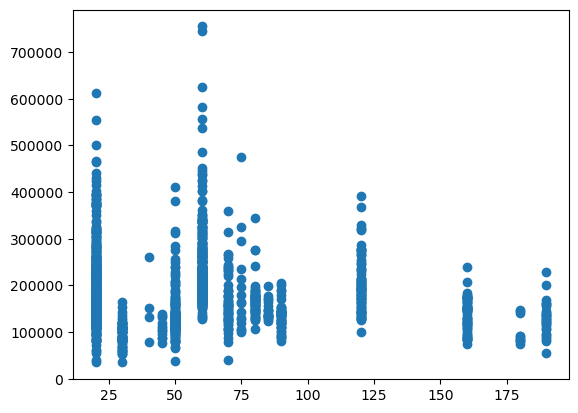

In [7]:
plt.scatter(x='MSSubClass', y='SalePrice', data=train_df)
plt.show()

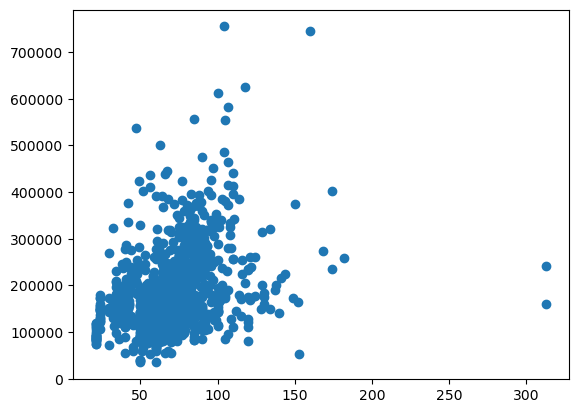

In [8]:
plt.scatter(x='LotFrontage', y='SalePrice', data=train_df)
plt.show()

In [9]:
train_df[train_df['LotFrontage'] > 300]
# Drop 935, 1299 ID

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
934    935          20       RL        313.0    27650   Pave   NaN      IR2   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
934          HLS    AllPub  ...        0    NaN   NaN         NaN       0   
1298         Bnk    AllPub  ...      480     Gd   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
934      11   2008        WD         Normal     242000  
1298      1   2008       New        Partial     160000  

[2 rows x 81 columns]

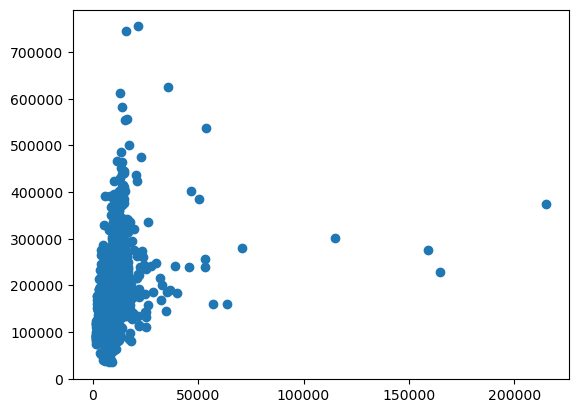

In [10]:
plt.scatter(x='LotArea', y='SalePrice', data=train_df)
plt.show()

In [11]:
train_df[train_df['LotArea'] > 55000]
# Drop ID 250, 314, 336, 707
# 1299 aready need to drop in case of LotFrontage
# Maybe drop 1397

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
249    250          50       RL          NaN   159000   Pave   NaN      IR2   
313    314          20       RL        150.0   215245   Pave   NaN      IR3   
335    336         190       RL          NaN   164660   Grvl   NaN      IR1   
451    452          20       RL         62.0    70761   Pave   NaN      IR1   
706    707          20       RL          NaN   115149   Pave   NaN      IR2   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   
1396  1397          20       RL          NaN    57200   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
249          Low    AllPub  ...        0    NaN   NaN        Shed     500   
313          Low    AllPub  ...        0    NaN   NaN         NaN       0   
335          HLS    AllPub  ...        0    NaN   NaN        Shed     700   
451          Low    AllPub  ...        0    NaN   NaN         NaN       0   
706          Low    AllPub  ...        0    NaN   NaN         NaN       0   
1298         Bnk    AllPub  ...      480     Gd   NaN         NaN       0   
1396         Bnk    AllPub  ...        0    NaN   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
249       6   2007        WD         Normal     277000  
313       6   2009        WD         Normal     375000  
335       8   2008        WD         Normal     228950  
451      12   2006        WD         Normal     280000  
706       6   2007        WD         Normal     302000  
1298      1   2008       New        Partial     160000  
1396      6   2010        WD         Normal     160000  

[7 rows x 81 columns]

In [12]:
stats.zscore(train_df['LotArea']).sort_values().tail(10)

384      4.268474
457      4.280500
769      4.308262
1396     4.678682
1298     5.348867
451      6.037793
706     10.486449
249     14.881285
335     15.448542
313     20.518273
Name: LotArea, dtype: float64

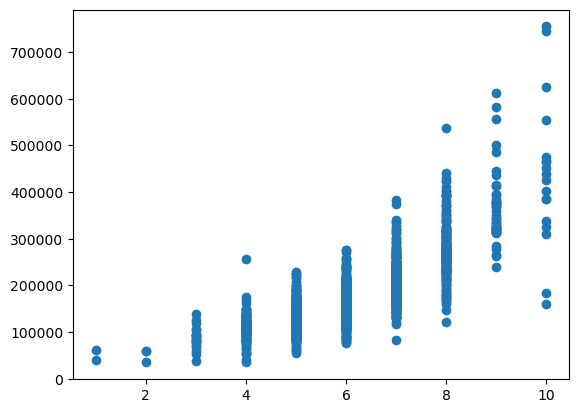

In [13]:
plt.scatter(x='OverallQual', y='SalePrice', data=train_df)
plt.show()

In [14]:
train_df[(train_df['OverallQual'] == 10) & (train_df['SalePrice'] < 200000)]
# 1299 Already in droping list 
# Maybe drop 524

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
523    524          60       RL        130.0    40094   Pave   NaN      IR1   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
523          Bnk    AllPub  ...        0    NaN   NaN         NaN       0   
1298         Bnk    AllPub  ...      480     Gd   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
523      10   2007       New        Partial     184750  
1298      1   2008       New        Partial     160000  

[2 rows x 81 columns]

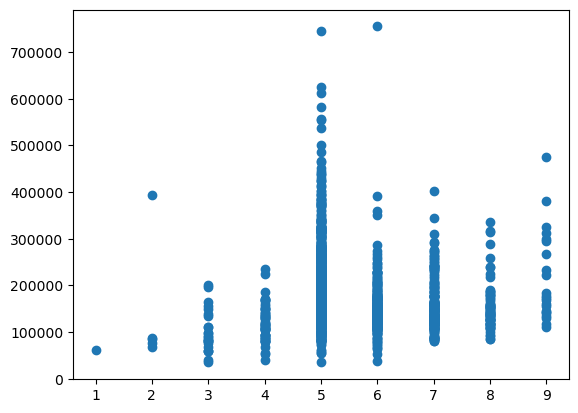

In [15]:
plt.scatter(x='OverallCond', y='SalePrice', data=train_df)
plt.show()

In [16]:
train_df[train_df['OverallCond'] == 2]
# Drop ID 379 

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
88    89          50  C (all)        105.0     8470   Pave   NaN      IR1   
250  251          30       RL         55.0     5350   Pave   NaN      IR1   
378  379          20       RL         88.0    11394   Pave   NaN      Reg   
398  399          30       RM         60.0     8967   Pave   NaN      Reg   
676  677          70       RM         60.0     9600   Pave  Grvl      Reg   

    LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
88          Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
250         Lvl    AllPub  ...        0    NaN   GdWo        Shed     450   
378         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
398         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
676         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
88      10   2009     ConLD        Abnorml      85000  
250      5   2010        WD         Normal      76500  
378      6   2010       New        Partial     394432  
398     11   2007        WD        Abnorml      67000  
676      5   2006        WD         Normal      87000  

[5 rows x 81 columns]

In [17]:
train_df[train_df['SalePrice'] > 700000]
# Drop ID 1183 and 692

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
691    692          60       RL        104.0    21535   Pave   NaN      IR1   
1182  1183          60       RL        160.0    15623   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
691          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1182         Lvl    AllPub  ...      555     Ex  MnPrv         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
691       1   2007        WD         Normal     755000  
1182      7   2007        WD        Abnorml     745000  

[2 rows x 81 columns]

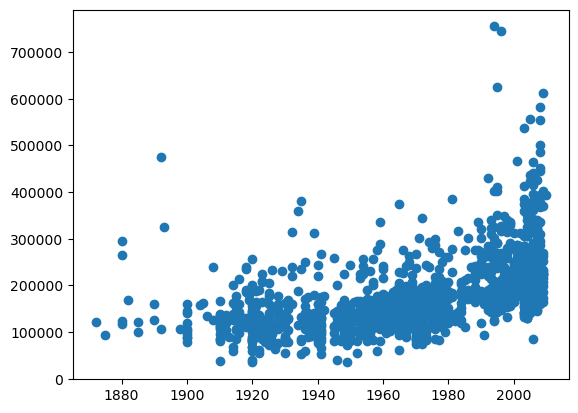

In [18]:
plt.scatter(x='YearBuilt', y='SalePrice', data=train_df)
plt.show()

In [19]:
train_df[(train_df['SalePrice'] > 400000) & (train_df['YearBuilt'] < 1900)]
# Drop 186

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
185  186          75       RM         90.0    22950   Pave   NaN      IR2   

    LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
185         Lvl    AllPub  ...        0    NaN  GdPrv         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
185      6   2006        WD         Normal     475000  

[1 rows x 81 columns]

In [20]:
train_df[train_df['SalePrice'] > 700000]
# Already Looked at those and they needs to drop 

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
691    692          60       RL        104.0    21535   Pave   NaN      IR1   
1182  1183          60       RL        160.0    15623   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
691          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1182         Lvl    AllPub  ...      555     Ex  MnPrv         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
691       1   2007        WD         Normal     755000  
1182      7   2007        WD        Abnorml     745000  

[2 rows x 81 columns]

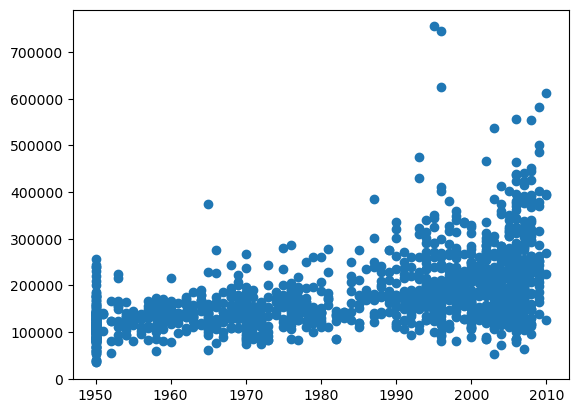

In [21]:
plt.scatter(x='YearRemodAdd', y='SalePrice', data=train_df)
plt.show()

In [22]:
# We have already looked at the price above 700K so we will igonre those 2 rows for other features as we will drop them 
train_df[(train_df['SalePrice'] > 300000) & (train_df['YearRemodAdd'] < 1970)]
# Drop 314

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
313  314          20       RL        150.0   215245   Pave   NaN      IR3   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
313         Low    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
313      6   2009        WD         Normal     375000  

[1 rows x 81 columns]

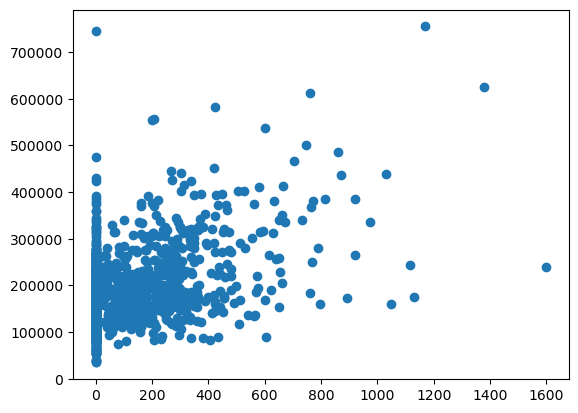

In [23]:
plt.scatter(x='MasVnrArea', y='SalePrice', data=train_df)
plt.show()

In [24]:
train_df[train_df['MasVnrArea'] > 1500]
# 298

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
297  298          60       FV         66.0     7399   Pave  Pave      IR1   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
297         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
297      6   2007        WD         Normal     239000  

[1 rows x 81 columns]

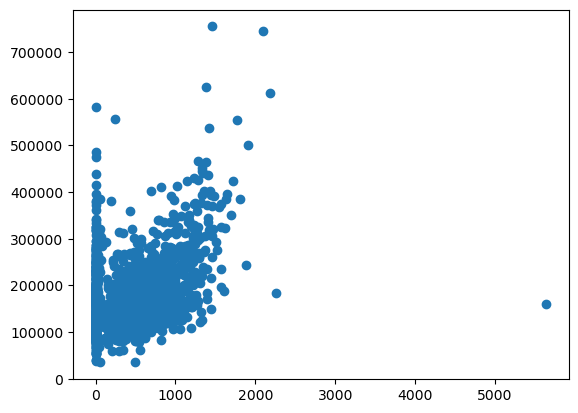

In [25]:
plt.scatter(x='BsmtFinSF1', y='SalePrice', data=train_df)
plt.show()

In [26]:
train_df[train_df['BsmtFinSF1'] > 5000]
# 1299 Aready seen in outlier for other columns also so definately gonna drop this row

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
1298         Bnk    AllPub  ...      480     Gd   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1298      1   2008       New        Partial     160000  

[1 rows x 81 columns]

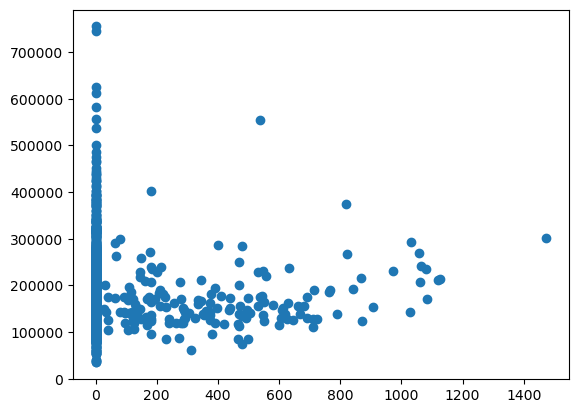

In [27]:
plt.scatter(x='BsmtFinSF2', y='SalePrice', data=train_df)
plt.show()

In [28]:
train_df[train_df['BsmtFinSF2'] > 1400]
# 323

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
322  323          60       RL         86.0    10380   Pave   NaN      IR1   

    LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
322         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
322      8   2007        WD         Normal     301000  

[1 rows x 81 columns]

In [29]:
train_df[(train_df['SalePrice'] > 500000) & (train_df['BsmtFinSF2'] > 400)]
# 441

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
440  441          20       RL        105.0    15431   Pave   NaN      Reg   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
440         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
440      4   2009        WD         Normal     555000  

[1 rows x 81 columns]

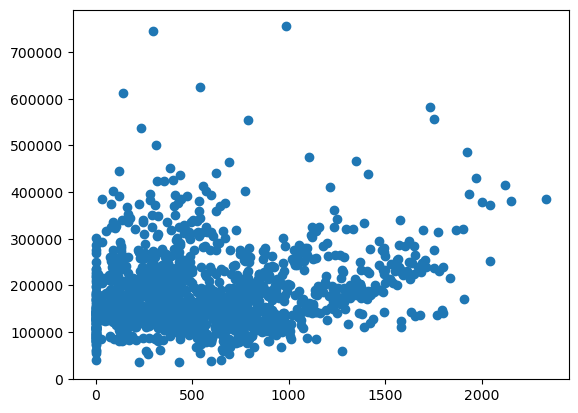

In [30]:
plt.scatter(x='BsmtUnfSF', y='SalePrice', data=train_df)
plt.show()

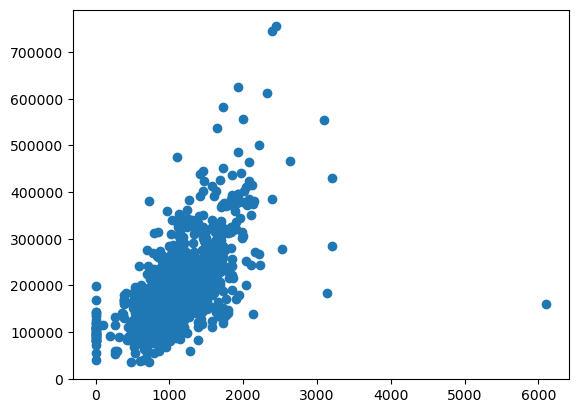

In [31]:
plt.scatter(x='TotalBsmtSF', y='SalePrice', data=train_df)
plt.show()

In [32]:
train_df[train_df['TotalBsmtSF'] > 6000]
# 1299

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
1298         Bnk    AllPub  ...      480     Gd   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1298      1   2008       New        Partial     160000  

[1 rows x 81 columns]

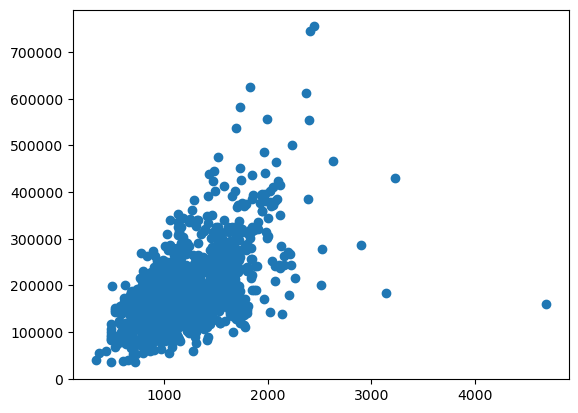

In [33]:
plt.scatter(x='1stFlrSF', y='SalePrice', data=train_df)
plt.show()

In [34]:
train_df[train_df['TotalBsmtSF'] > 4000]
# 1299

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
1298         Bnk    AllPub  ...      480     Gd   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1298      1   2008       New        Partial     160000  

[1 rows x 81 columns]

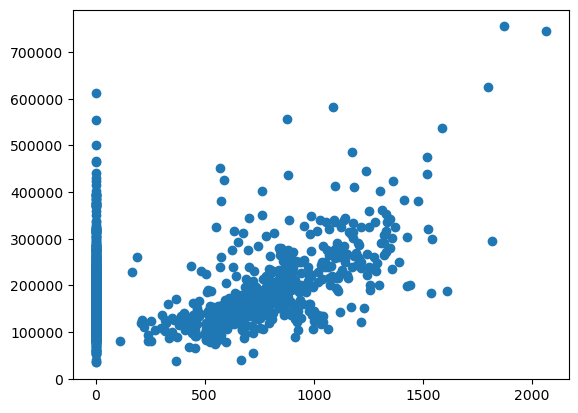

In [35]:
plt.scatter(x='2ndFlrSF', y='SalePrice', data=train_df)
plt.show()

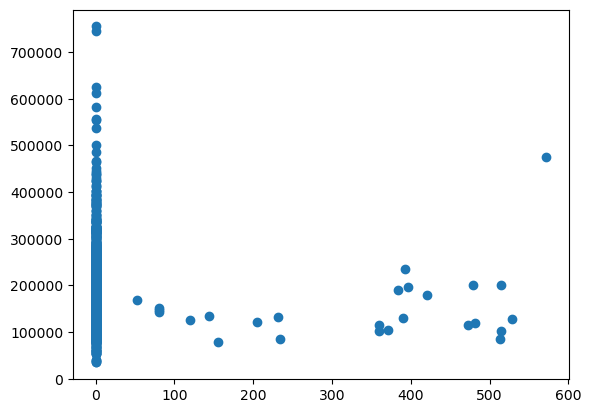

In [36]:
plt.scatter(x='LowQualFinSF', y='SalePrice', data=train_df)
plt.show()

In [37]:
train_df[train_df['LowQualFinSF'] > 500]
# 186

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
88      89          50  C (all)        105.0     8470   Pave   NaN      IR1   
170    171          50       RM          NaN    12358   Pave   NaN      IR1   
185    186          75       RM         90.0    22950   Pave   NaN      IR2   
635    636         190       RH         60.0    10896   Pave  Pave      Reg   
1009  1010          50       RL         60.0     6000   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
88           Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
170          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
185          Lvl    AllPub  ...        0    NaN  GdPrv         NaN       0   
635          Bnk    AllPub  ...        0    NaN    NaN         NaN       0   
1009         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
88       10   2009     ConLD        Abnorml      85000  
170       5   2007        WD         Normal     128500  
185       6   2006        WD         Normal     475000  
635       3   2007        WD        Abnorml     200000  
1009      6   2006        WD         Normal     102000  

[5 rows x 81 columns]

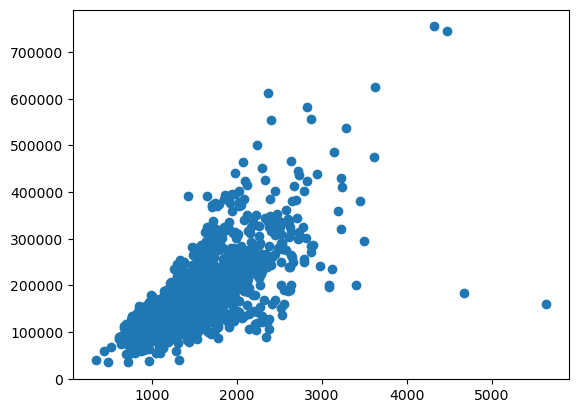

In [38]:
plt.scatter(x='GrLivArea', y='SalePrice', data=train_df)
plt.show()

In [39]:
train_df[train_df['GrLivArea'] > 4400]
# 1299,  524

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
523    524          60       RL        130.0    40094   Pave   NaN      IR1   
1182  1183          60       RL        160.0    15623   Pave   NaN      IR1   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
523          Bnk    AllPub  ...        0    NaN    NaN         NaN       0   
1182         Lvl    AllPub  ...      555     Ex  MnPrv         NaN       0   
1298         Bnk    AllPub  ...      480     Gd    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
523      10   2007       New        Partial     184750  
1182      7   2007        WD        Abnorml     745000  
1298      1   2008       New        Partial     160000  

[3 rows x 81 columns]

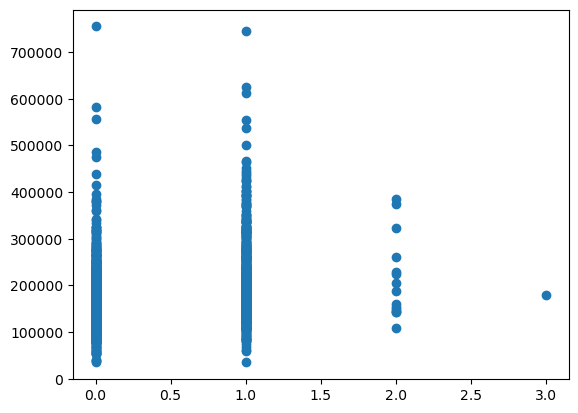

In [40]:
plt.scatter(x='BsmtFullBath', y='SalePrice', data=train_df)
plt.show()

In [41]:
train_df[train_df['BsmtFullBath'] == 3]
# Maybe 739

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
738  739          90       RL         60.0    10800   Pave   NaN      Reg   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
738         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
738      3   2009        WD         Alloca     179000  

[1 rows x 81 columns]

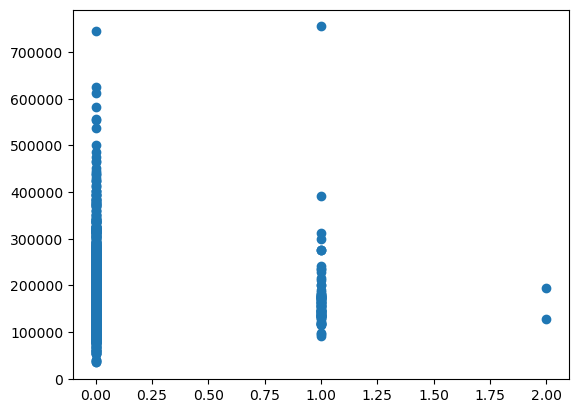

In [42]:
plt.scatter(x='BsmtHalfBath', y='SalePrice', data=train_df)
plt.show()

In [43]:
stats.zscore(train_df['BsmtHalfBath']).unique()

array([-0.24106104,  3.94880935,  8.13867973])

In [44]:
train_df[train_df['BsmtHalfBath'] == 2 ]
# 598, 955

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
597  598         120       RL         53.0     3922   Pave   NaN      Reg   
954  955          90       RL         35.0     9400   Pave   NaN      IR1   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
597         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
954         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
597      2   2007       New        Partial     194201  
954     10   2006        WD        AdjLand     127500  

[2 rows x 81 columns]

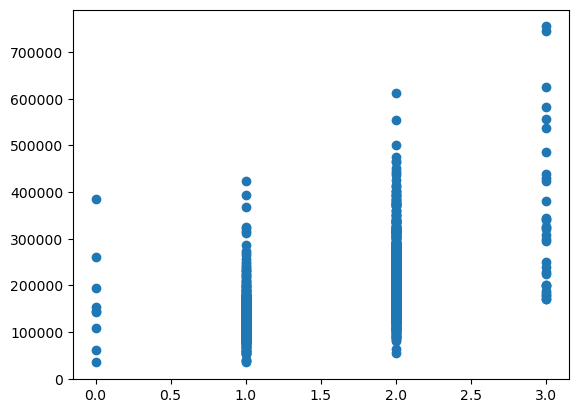

In [45]:
plt.scatter(x='FullBath', y='SalePrice', data=train_df)
plt.show()

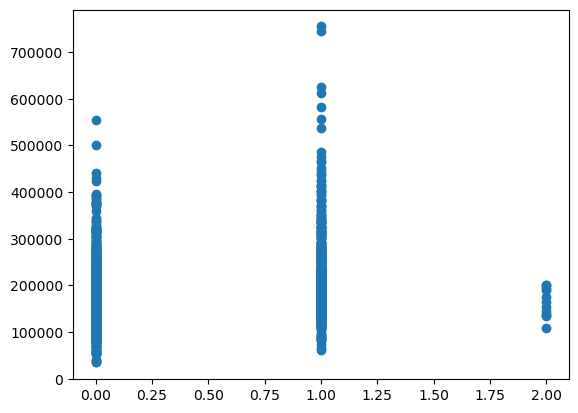

In [46]:
plt.scatter(x='HalfBath', y='SalePrice', data=train_df)
plt.show()

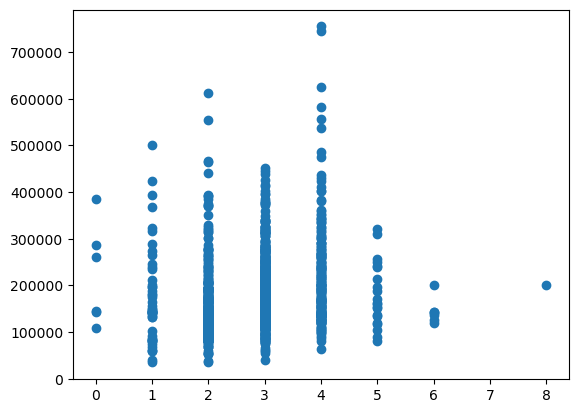

In [47]:
plt.scatter(x='BedroomAbvGr', y='SalePrice', data=train_df)
plt.show()

In [48]:
train_df[train_df['BedroomAbvGr'] == 8 ]
#  636

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
635  636         190       RH         60.0    10896   Pave  Pave      Reg   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
635         Bnk    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
635      3   2007        WD        Abnorml     200000  

[1 rows x 81 columns]

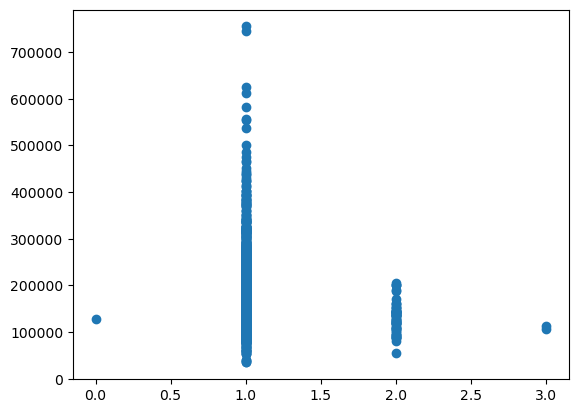

In [49]:
plt.scatter(x='KitchenAbvGr', y='SalePrice', data=train_df)
plt.show()

In [50]:
train_df[train_df['KitchenAbvGr'] == 3 ]
# 49, 810

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
48    49         190       RM         33.0     4456   Pave   NaN      Reg   
809  810          75       RM         90.0     8100   Pave   NaN      Reg   

    LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
48          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
809         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
48       6   2009       New        Partial     113000  
809     11   2009        WD         Normal     106000  

[2 rows x 81 columns]

In [51]:
train_df[train_df['KitchenAbvGr'] == 0 ]
# 955

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
954  955          90       RL         35.0     9400   Pave   NaN      IR1   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
954         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
954     10   2006        WD        AdjLand     127500  

[1 rows x 81 columns]

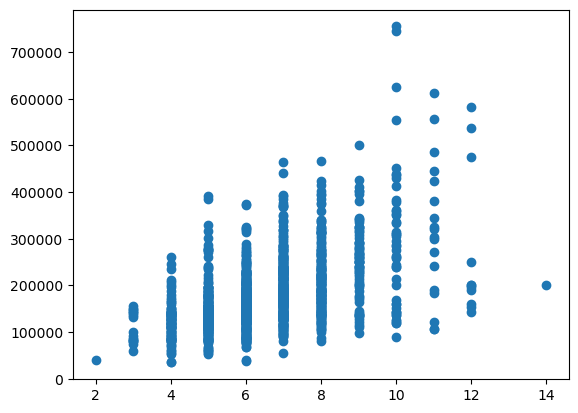

In [52]:
plt.scatter(x='TotRmsAbvGrd', y='SalePrice', data=train_df)
plt.show()

In [53]:
train_df[train_df['TotRmsAbvGrd'] == 14 ]
# 636

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
635  636         190       RH         60.0    10896   Pave  Pave      Reg   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
635         Bnk    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
635      3   2007        WD        Abnorml     200000  

[1 rows x 81 columns]

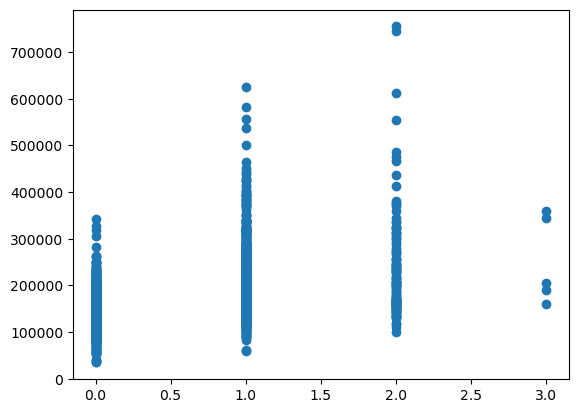

In [54]:
plt.scatter(x='Fireplaces', y='SalePrice', data=train_df)
plt.show()

In [55]:
train_df[train_df['Fireplaces'] == 3 ]
# 167, 310, 606, 643, 1299

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
166    167          20       RL          NaN    10708   Pave   NaN      IR1   
309    310          20       RL         90.0    12378   Pave   NaN      IR1   
605    606          60       RL         85.0    13600   Pave   NaN      Reg   
642    643          80       RL         75.0    13860   Pave   NaN      Reg   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
166          Lvl    AllPub  ...        0    NaN   GdWo         NaN       0   
309          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
605          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
642          Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1298         Bnk    AllPub  ...      480     Gd    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
166      11   2009       COD         Normal     190000  
309      11   2006        WD         Normal     360000  
605      10   2009        WD         Normal     205000  
642       7   2009        WD         Normal     345000  
1298      1   2008       New        Partial     160000  

[5 rows x 81 columns]

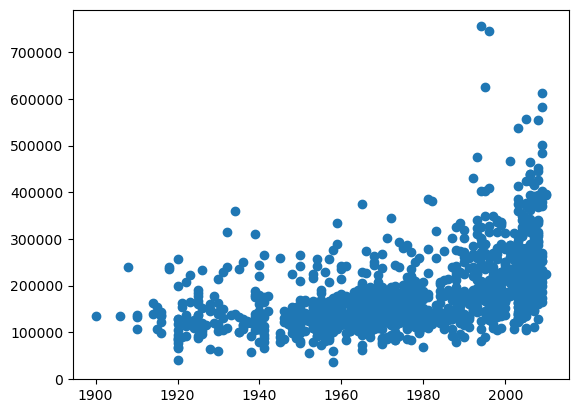

In [56]:
plt.scatter(x='GarageYrBlt', y='SalePrice', data=train_df)
plt.show()

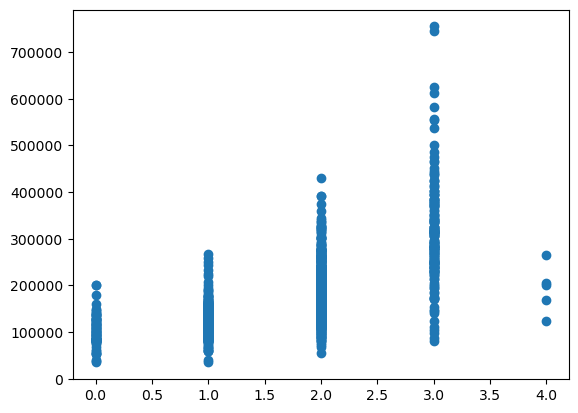

In [57]:
plt.scatter(x='GarageCars', y='SalePrice', data=train_df)
plt.show()

In [58]:
train_df[train_df['GarageCars'] == 4 ]
# Maybe drop 421, 748, 1191, 1341, 1351

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
420    421          90       RM         78.0     7060   Pave   NaN      Reg   
747    748          70       RM         65.0    11700   Pave  Pave      IR1   
1190  1191         190       RL          NaN    32463   Pave   NaN      Reg   
1340  1341          20       RL         70.0     8294   Pave   NaN      Reg   
1350  1351          90       RL         91.0    11643   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
420          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
747          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
1190         Low    AllPub  ...        0    NaN   NaN         NaN       0   
1340         Lvl    AllPub  ...        0    NaN  GdWo         NaN       0   
1350         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
420      11   2008        WD         Alloca     206300  
747       5   2009        WD         Normal     265979  
1190      3   2007        WD         Normal     168000  
1340      6   2007        WD         Normal     123000  
1350      8   2009        WD         Normal     200000  

[5 rows x 81 columns]

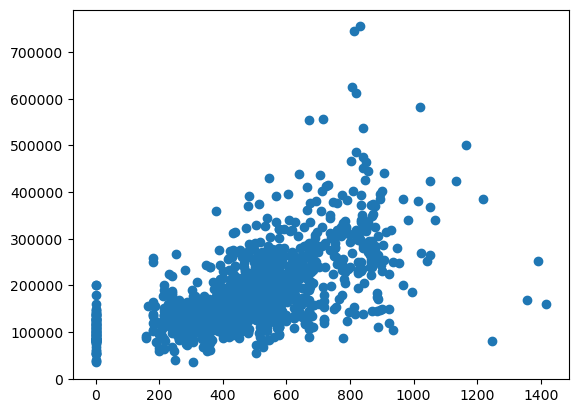

In [59]:
plt.scatter(x='GarageArea', y='SalePrice', data=train_df)
plt.show()

In [60]:
train_df[train_df['GarageArea'] > 1200 ]
# 1062, 582, 1191, 1299

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
581    582          20       RL         98.0    12704   Pave   NaN      Reg   
825    826          20       RL        114.0    14803   Pave   NaN      Reg   
1061  1062          30  C (all)        120.0    18000   Grvl   NaN      Reg   
1190  1191         190       RL          NaN    32463   Pave   NaN      Reg   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
581          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
825          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
1061         Low    AllPub  ...        0    NaN   NaN        Shed     560   
1190         Low    AllPub  ...        0    NaN   NaN         NaN       0   
1298         Bnk    AllPub  ...      480     Gd   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
581       8   2009       New        Partial     253293  
825       6   2008       New        Partial     385000  
1061      8   2008     ConLD         Normal      81000  
1190      3   2007        WD         Normal     168000  
1298      1   2008       New        Partial     160000  

[5 rows x 81 columns]

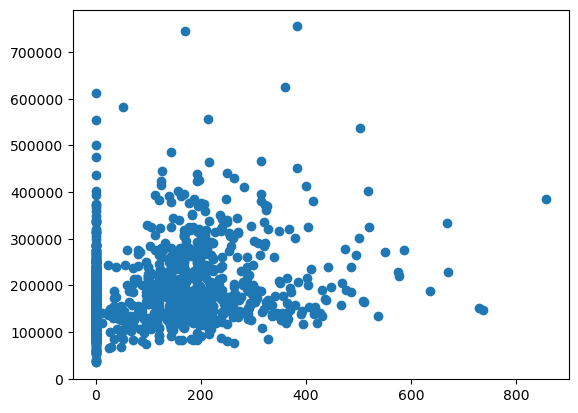

In [61]:
plt.scatter(x='WoodDeckSF', y='SalePrice', data=train_df)
plt.show()

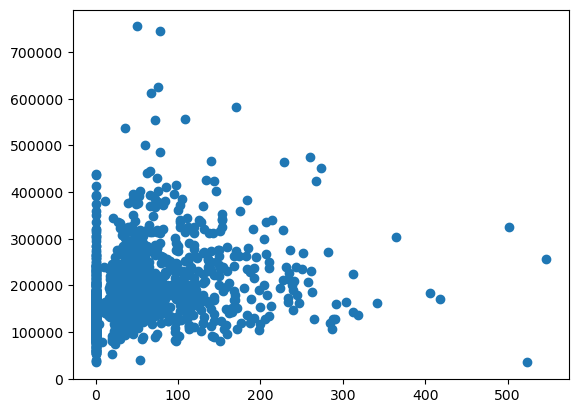

In [62]:
plt.scatter(x='OpenPorchSF', y='SalePrice', data=train_df)
plt.show()

In [63]:
train_df[train_df['OpenPorchSF'] > 500 ]
# 496, 584, 1329

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
495    496          30  C (all)         60.0     7879   Pave   NaN      Reg   
583    584          75       RM         75.0    13500   Pave   NaN      Reg   
1328  1329          50       RM         60.0    10440   Pave  Grvl      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
495          Lvl    AllPub  ...        0    NaN   GdWo         NaN       0   
583          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1328         Lvl    AllPub  ...        0    NaN  MnPrv        Shed    1150   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
495      11   2009        WD        Abnorml      34900  
583       7   2008        WD         Normal     325000  
1328      6   2008        WD         Normal     256000  

[3 rows x 81 columns]

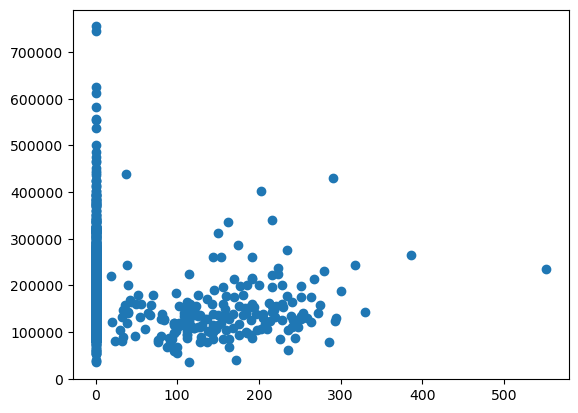

In [64]:
plt.scatter(x='EnclosedPorch', y='SalePrice', data=train_df)
plt.show()

In [65]:
train_df[train_df['EnclosedPorch'] > 500 ]
# 198

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
197  198          75       RL        174.0    25419   Pave   NaN      Reg   

    LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
197         Lvl    AllPub  ...      512     Ex  GdPrv         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
197      3   2006        WD        Abnorml     235000  

[1 rows x 81 columns]

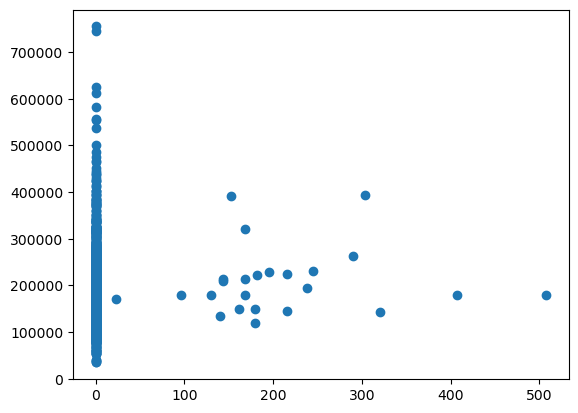

In [66]:
plt.scatter(x='3SsnPorch', y='SalePrice', data=train_df)
plt.show()

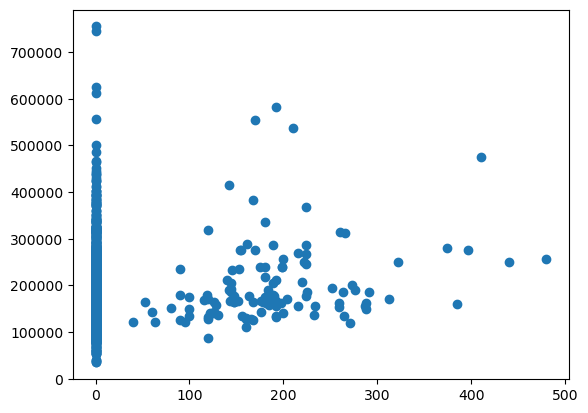

In [67]:
plt.scatter(x='ScreenPorch', y='SalePrice', data=train_df)
plt.show()

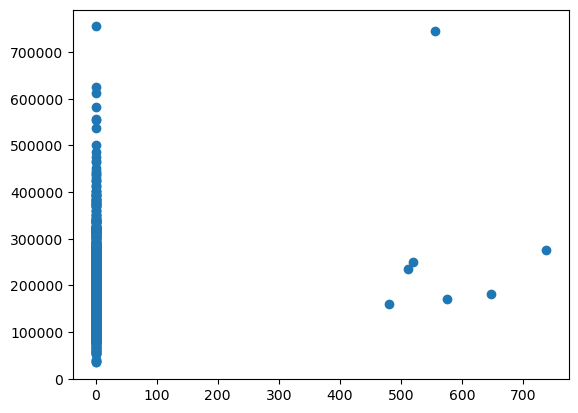

In [68]:
plt.scatter(x='PoolArea', y='SalePrice', data=train_df)
plt.show()

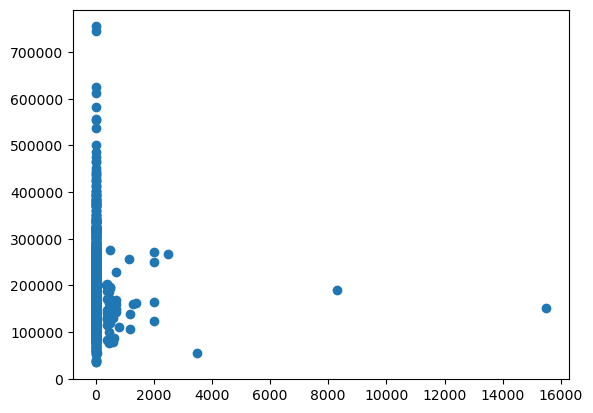

In [69]:
plt.scatter(x='MiscVal', y='SalePrice', data=train_df)
plt.show()

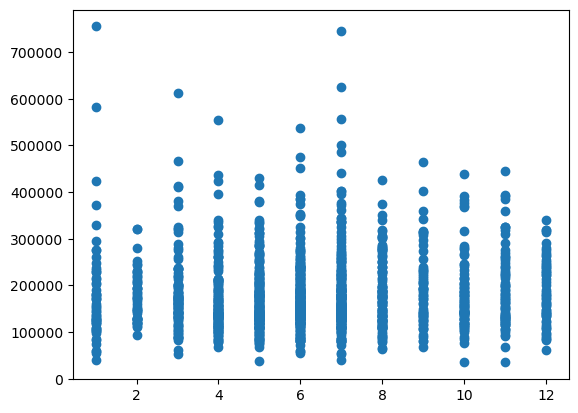

In [70]:
plt.scatter(x='MoSold', y='SalePrice', data=train_df)
plt.show()

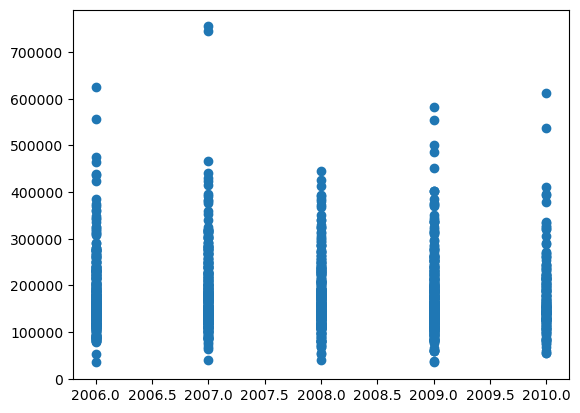

In [71]:
plt.scatter(x='YrSold', y='SalePrice', data=train_df)
plt.show()

In [72]:
values = [598, 955, 935, 1299, 250, 314, 336, 707, 379, 1183, 692, 186, 441, 186, 524, 739, 598, 955, 636, 1062, 1191, 496, 198, 1338, 1183, 692]

In [73]:
train_df = train_df[train_df.Id.isin(values) == False]

In [74]:
train_df.shape

(1439, 81)

## Handling Missing Values

Handling missing values and selecting columns that needs to be dropped using box plot

In [75]:
# Checking for Null values in each columns
null_values_count = train_df.isnull().sum().sort_values(ascending=False)
null_values_count[null_values_count>0]

PoolQC          1435
MiscFeature     1388
Alley           1350
Fence           1162
MasVnrType       861
FireplaceQu      684
LotFrontage      255
GarageYrBlt       76
GarageCond        76
GarageType        76
GarageFinish      76
GarageQual        76
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

In [76]:
train_df['MiscFeature'].value_counts()

MiscFeature
Shed    46
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64

In [77]:
train_df['Alley'].value_counts()

Alley
Grvl    49
Pave    40
Name: count, dtype: int64

In [78]:
# Lets fill nan value with No as nan refers to no alley 
train_df['Alley'].fillna('No', inplace=True)

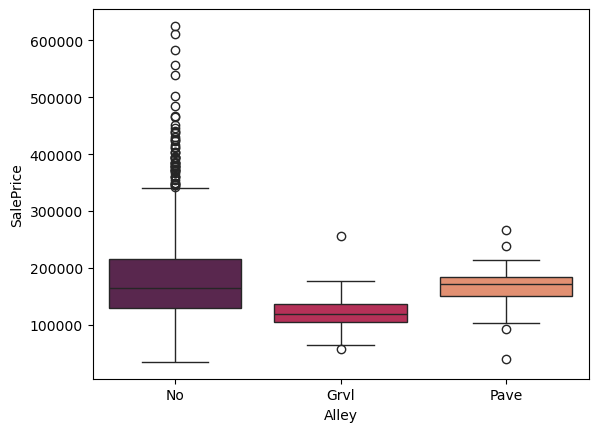

In [79]:
sns.boxplot(data= train_df, x ='Alley', y = 'SalePrice', palette='rocket')
plt.show()

In [80]:
train_df['Fence'].value_counts()

Fence
MnPrv    156
GdPrv     57
GdWo      53
MnWw      11
Name: count, dtype: int64

In [81]:
train_df['Fence'].fillna('No', inplace=True)

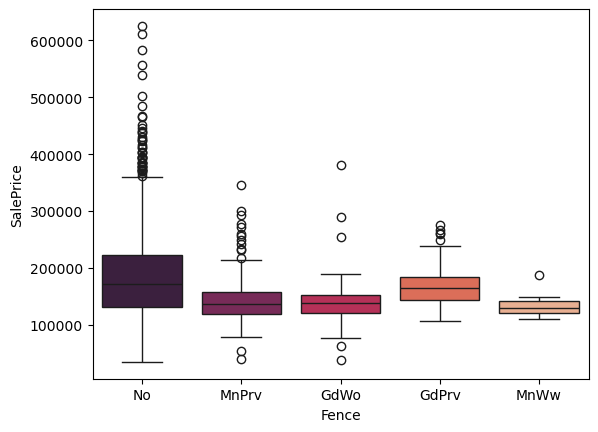

In [82]:
sns.boxplot(data= train_df, x ='Fence', y = 'SalePrice', palette='rocket')
plt.show()

In [83]:
train_df['MasVnrType'].value_counts()

MasVnrType
BrkFace    442
Stone      122
BrkCmn      14
Name: count, dtype: int64

In [84]:
train_df['MasVnrType'].fillna('No', inplace=True)

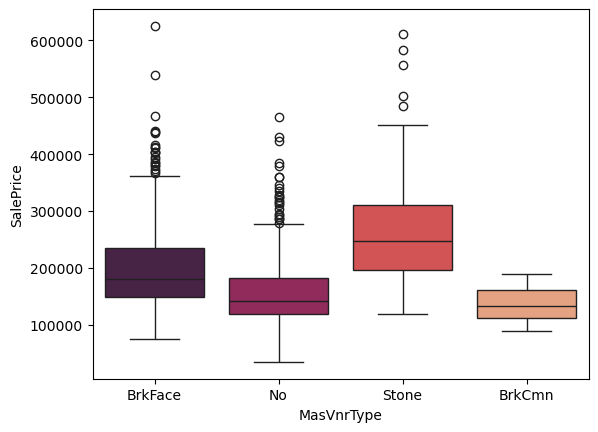

In [85]:
sns.boxplot(data= train_df, x ='MasVnrType', y = 'SalePrice', palette='rocket')
plt.show()

In [86]:
train_df['FireplaceQu'].value_counts()

FireplaceQu
Gd    373
TA    308
Fa     33
Ex     21
Po     20
Name: count, dtype: int64

In [87]:
train_df['FireplaceQu'].fillna('No', inplace=True)

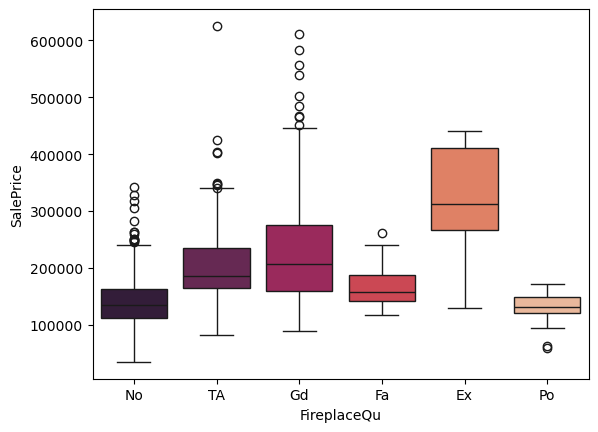

In [88]:
sns.boxplot(data= train_df, x ='FireplaceQu', y = 'SalePrice', palette='rocket')
plt.show()

In [89]:
train_df['MasVnrArea'].value_counts()

MasVnrArea
0.0      850
108.0      8
180.0      8
72.0       7
16.0       7
        ... 
562.0      1
89.0       1
921.0      1
594.0      1
119.0      1
Name: count, Length: 324, dtype: int64

In [90]:
train_df['MasVnrArea'].fillna(0, inplace=True)

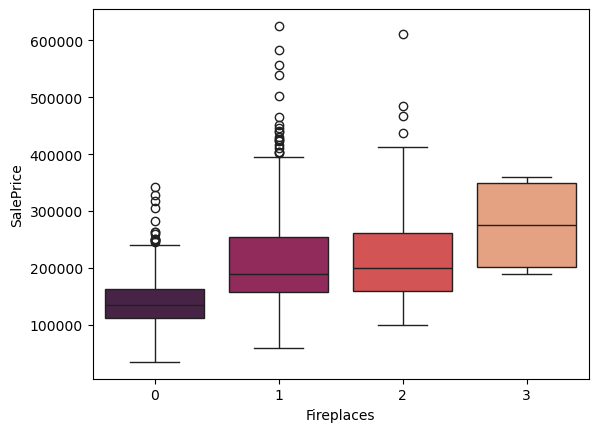

In [91]:
sns.boxplot(data= train_df, x ='Fireplaces', y = 'SalePrice', palette='rocket')
plt.show()

In [92]:
train_df['LotFrontage'].value_counts()

LotFrontage
60.0     140
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
174.0      1
38.0       1
112.0      1
140.0      1
46.0       1
Name: count, Length: 106, dtype: int64

In [93]:
train_df['LotFrontage'].fillna(0, inplace=True)

In [94]:
train_df['GarageYrBlt'].value_counts()

GarageYrBlt
2005.0    65
2006.0    58
2004.0    53
2003.0    50
2007.0    48
          ..
1918.0     1
1927.0     1
1908.0     1
1900.0     1
1933.0     1
Name: count, Length: 97, dtype: int64

In [95]:
train_df['GarageYrBlt'].corr(train_df['YearBuilt'])
# So there is pretty good relation with Yearrbuilt so I'm gonna drop GarageYrBlt column

0.8289827595060573

In [96]:
train_df['GarageCond'].value_counts()

GarageCond
TA    1310
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

In [97]:
train_df['GarageCond'].fillna('No', inplace=True)

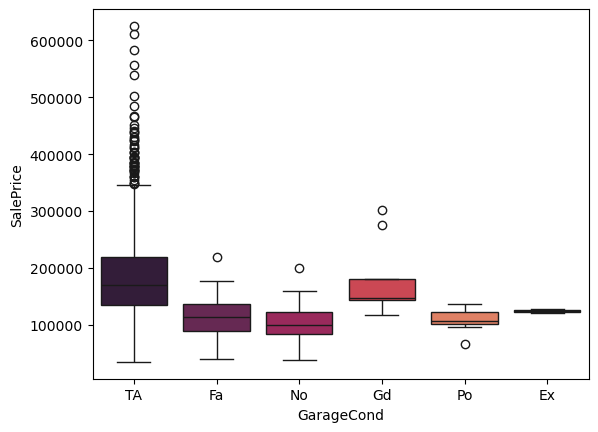

In [98]:
sns.boxplot(data= train_df, x ='GarageCond', y = 'SalePrice', palette='rocket')
plt.show()

In [99]:
train_df['GarageType'].value_counts()

GarageType
Attchd     859
Detchd     384
BuiltIn     87
Basment     19
CarPort      9
2Types       5
Name: count, dtype: int64

In [100]:
train_df['GarageType'].fillna('No', inplace=True)

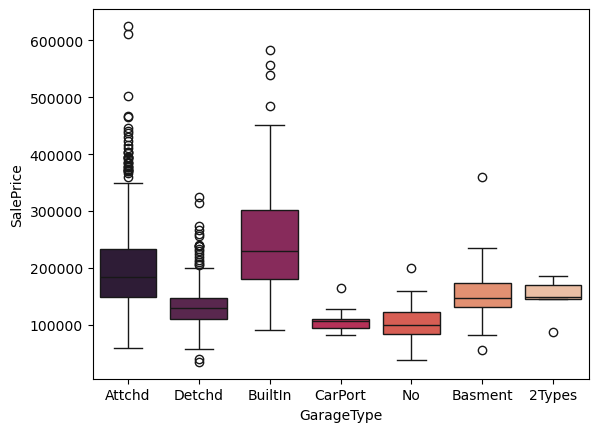

In [101]:
sns.boxplot(data= train_df, x ='GarageType', y = 'SalePrice', palette='rocket')
plt.show()

In [102]:
train_df['GarageFinish'].value_counts()

GarageFinish
Unf    602
RFn    419
Fin    342
Name: count, dtype: int64

In [103]:
train_df['GarageFinish'].fillna('No', inplace=True)

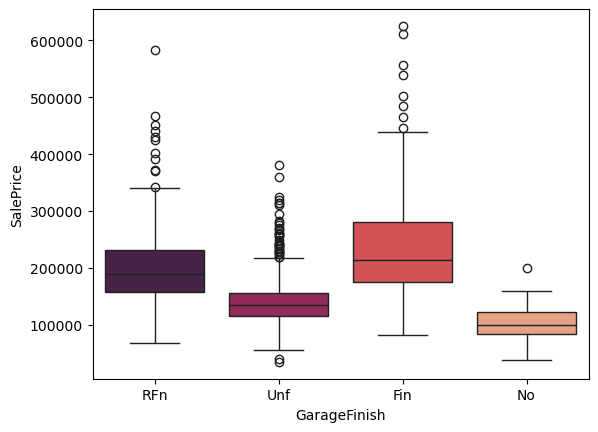

In [104]:
sns.boxplot(data= train_df, x ='GarageFinish', y = 'SalePrice', palette='rocket')
plt.show()

In [105]:
train_df['GarageQual'].value_counts()

GarageQual
TA    1296
Fa      48
Gd      14
Po       3
Ex       2
Name: count, dtype: int64

In [106]:
train_df['GarageQual'].fillna('No', inplace=True)

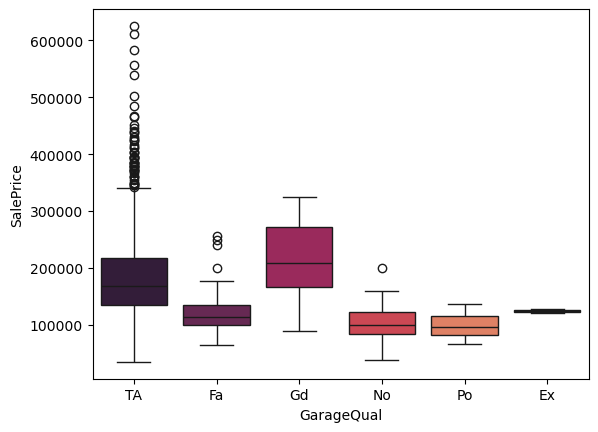

In [107]:
sns.boxplot(data= train_df, x ='GarageQual', y = 'SalePrice', palette='rocket')
plt.show()

In [108]:
train_df['BsmtFinType2'].value_counts()

BsmtFinType2
Unf    1239
Rec      53
LwQ      45
BLQ      32
ALQ      18
GLQ      14
Name: count, dtype: int64

In [109]:
train_df['BsmtFinType2'].fillna('No', inplace=True)

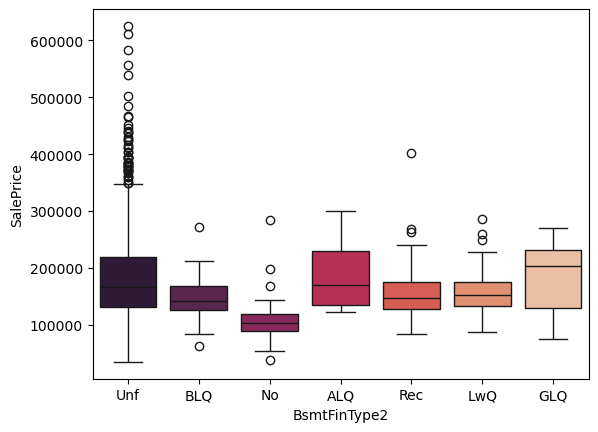

In [110]:
sns.boxplot(data= train_df, x ='BsmtFinType2', y = 'SalePrice', palette='rocket')
plt.show()

In [111]:
train_df['BsmtExposure'].value_counts()

BsmtExposure
No    948
Av    217
Gd    123
Mn    113
Name: count, dtype: int64

In [112]:
train_df['BsmtExposure'].fillna('No', inplace=True)

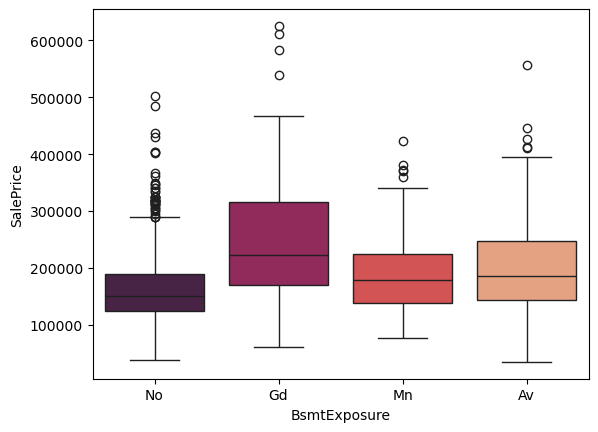

In [113]:
sns.boxplot(data= train_df, x ='BsmtExposure', y = 'SalePrice', palette='rocket')
plt.show()

In [114]:
train_df['BsmtQual'].value_counts()

BsmtQual
TA    641
Gd    612
Ex    114
Fa     35
Name: count, dtype: int64

In [115]:
train_df['BsmtQual'].fillna('No', inplace=True)

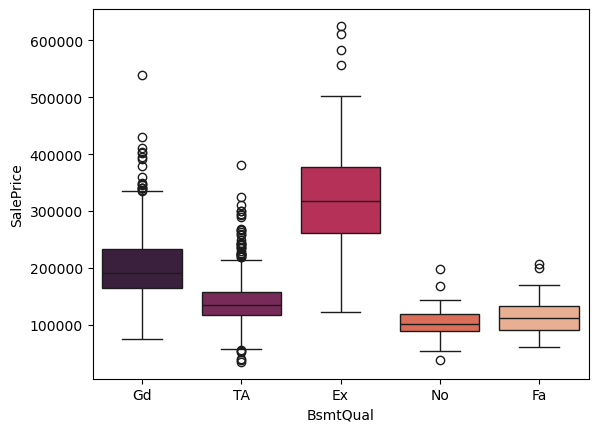

In [116]:
sns.boxplot(data= train_df, x ='BsmtQual', y = 'SalePrice', palette='rocket')
plt.show()

In [117]:
train_df['BsmtCond'].value_counts()

BsmtCond
TA    1293
Gd      63
Fa      44
Po       2
Name: count, dtype: int64

In [118]:
train_df['BsmtCond'].fillna('No', inplace=True)

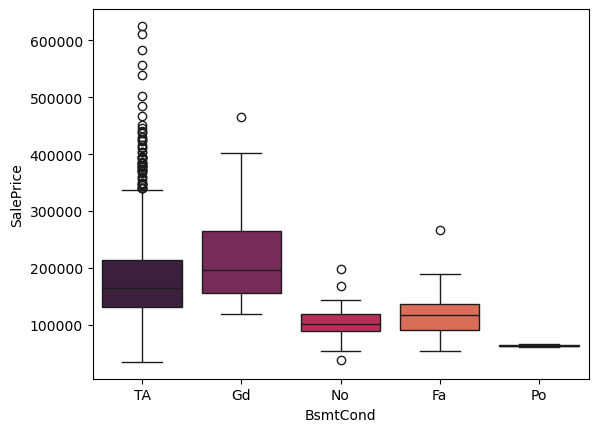

In [119]:
sns.boxplot(data= train_df, x ='BsmtCond', y = 'SalePrice', palette='rocket')
plt.show()

In [120]:
train_df['BsmtFinType1'].value_counts()

BsmtFinType1
Unf    426
GLQ    407
ALQ    218
BLQ    147
Rec    131
LwQ     73
Name: count, dtype: int64

In [121]:
train_df['BsmtFinType1'].fillna('No', inplace=True)

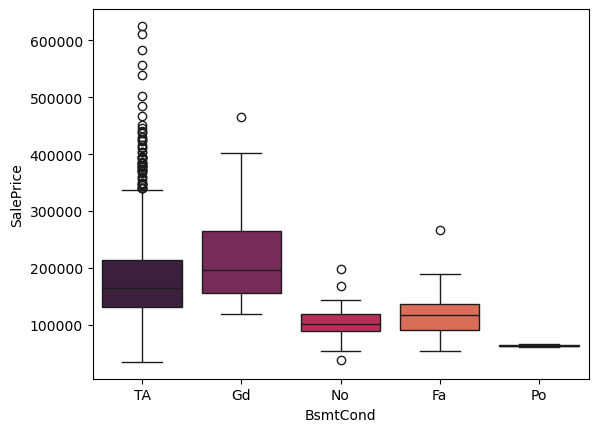

In [122]:
sns.boxplot(data= train_df, x ='BsmtCond', y = 'SalePrice', palette='rocket')
plt.show()

In [123]:
train_df['Electrical'].value_counts()

Electrical
SBrkr    1316
FuseA      91
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [124]:
train_df['Electrical'].fillna('SBrkr', inplace=True)

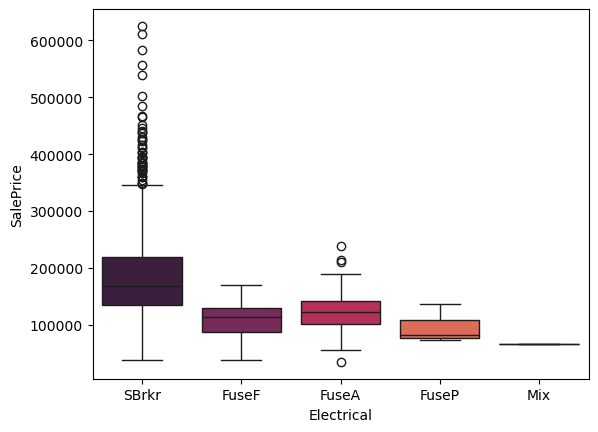

In [125]:
sns.boxplot(data= train_df, x ='Electrical', y = 'SalePrice', palette='rocket')
plt.show()

In [126]:
train_df.isnull().sum().sort_values(ascending = False)

PoolQC          1435
MiscFeature     1388
GarageYrBlt       76
BedroomAbvGr       0
GarageType         0
                ... 
MasVnrArea         0
MasVnrType         0
Exterior2nd        0
Exterior1st        0
SalePrice          0
Length: 81, dtype: int64

In [127]:
# Dropping columns 
train_df = train_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])

## Feature Engineering 

Adding new derived columns from existing columns and at the end dropping all the columns which are used in feature engineering as they will corelated with new derived column

In [128]:
# House Age Year sold - year built
train_df['houseage'] = train_df['YrSold'] - train_df['YearBuilt']

In [129]:
train_df['houseremodelage'] = train_df['YrSold'] - train_df['YearRemodAdd']

In [130]:
# Total Square feet of house adding all floors and basement
train_df['totalsf'] = train_df['1stFlrSF'] + train_df['2ndFlrSF'] + train_df['BsmtFinSF1'] + train_df['BsmtFinSF2']

In [131]:
# Total Area
train_df['totalarea'] = train_df['GrLivArea'] + train_df['TotalBsmtSF']

In [132]:
# Total Baths
train_df['totalbaths'] = train_df['BsmtFullBath'] + train_df['FullBath'] + 0.5 * (train_df['BsmtHalfBath'] + train_df['HalfBath']) 

In [133]:
# Toatal Porch square feet
train_df['totalporchsf'] = train_df['OpenPorchSF'] + train_df['3SsnPorch'] + train_df['EnclosedPorch'] + train_df['ScreenPorch'] + train_df['WoodDeckSF']

In [134]:
train_df.shape

(1439, 80)

In [135]:
# Dropping all Unneccessary columns 
train_df = train_df.drop(columns=['Id','YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 
                                  'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 
                                  'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])

In [136]:
train_df.shape

(1439, 61)

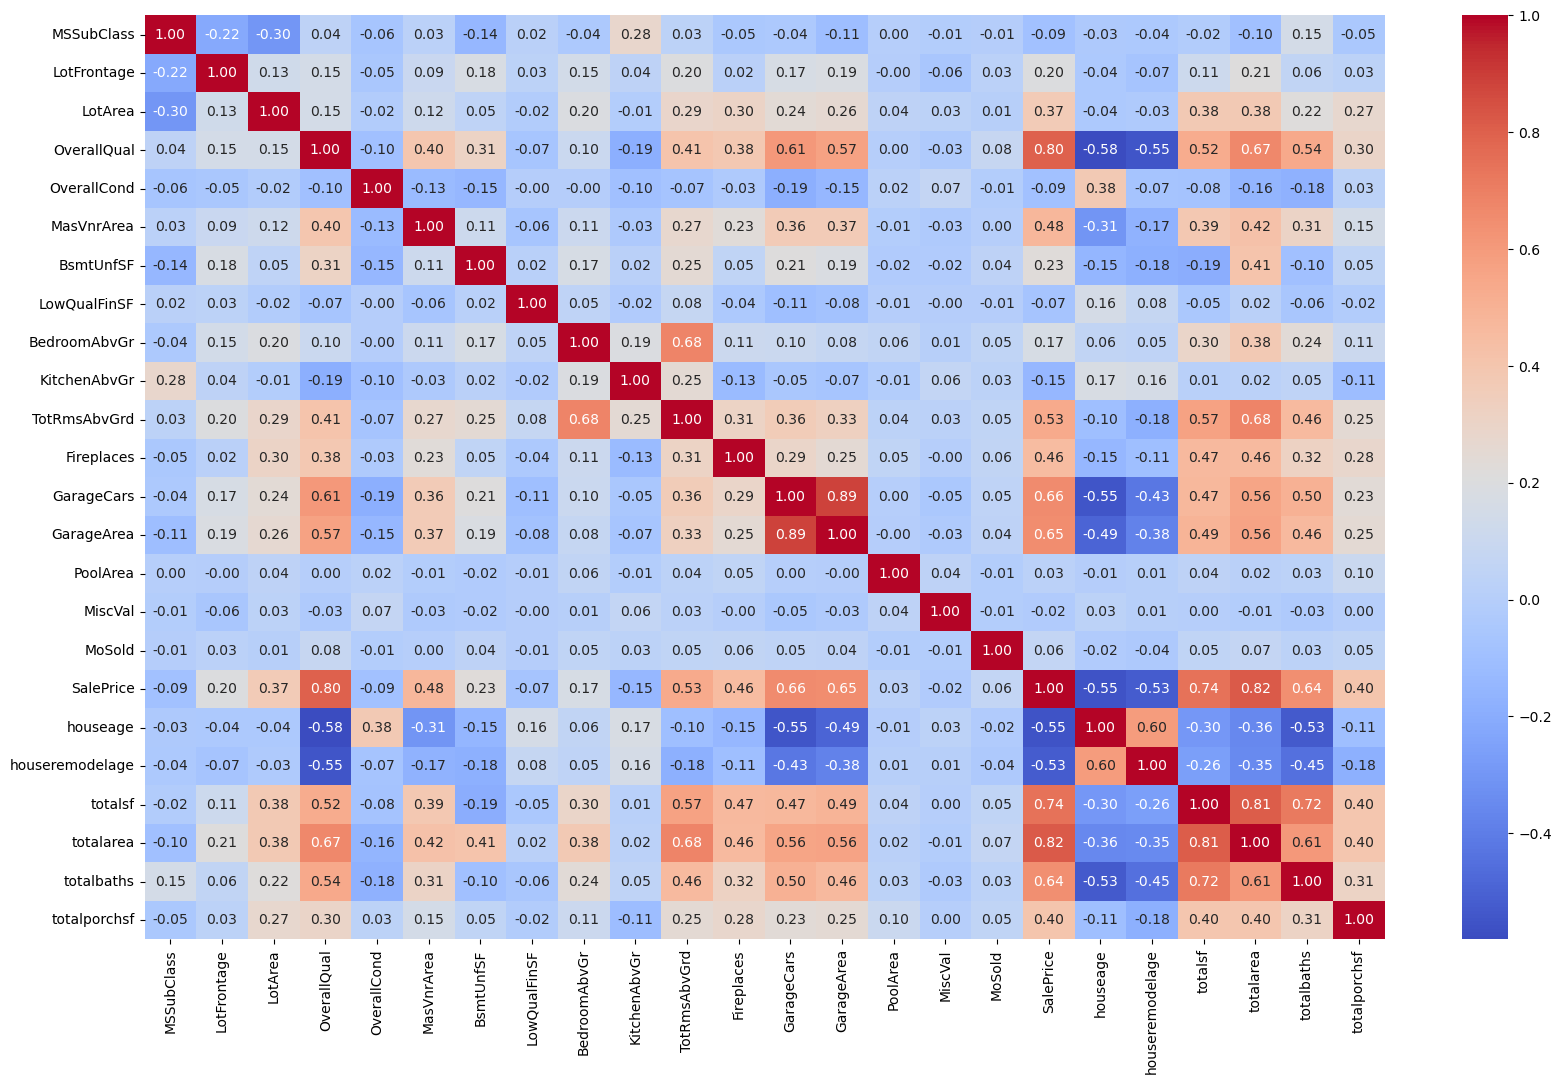

In [137]:
correlation_matrix = train_df.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [138]:
#drop GarageArea or GarageCars as they have high correlation
train_df = train_df.drop(columns=['GarageArea'])

# Univariate Analysis

Target column is SalePrice so performing univariate analysis on SalePrice, after that will also perform on other columns.

count      1439.000000
mean     179415.366921
std       75341.399716
min       35311.000000
25%      129900.000000
50%      162000.000000
75%      213125.000000
max      625000.000000
Name: SalePrice, dtype: float64


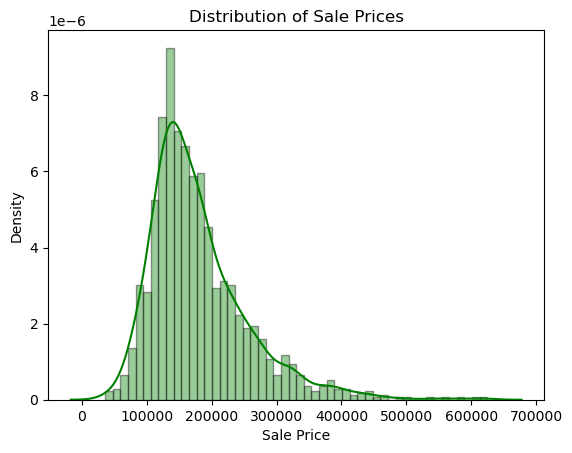

In [139]:
# Performing statical analysis on SalePrice 
print(train_df['SalePrice'].describe())
sns.distplot(train_df['SalePrice'], color='g', bins=50, hist_kws={'alpha':0.4, 'edgecolor': 'black'})
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Density')
plt.show()

In [140]:
# Applying logrithims to normalize SalePrice Data
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

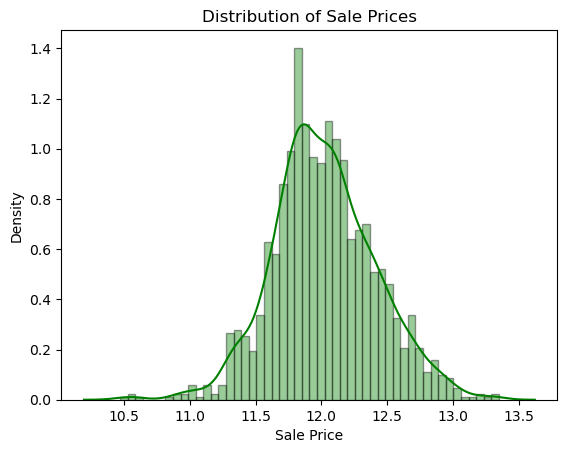

In [141]:
sns.distplot(train_df['SalePrice'], color='g', bins=50, hist_kws={'alpha':0.4, 'edgecolor': 'black'})
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Density')
plt.show()

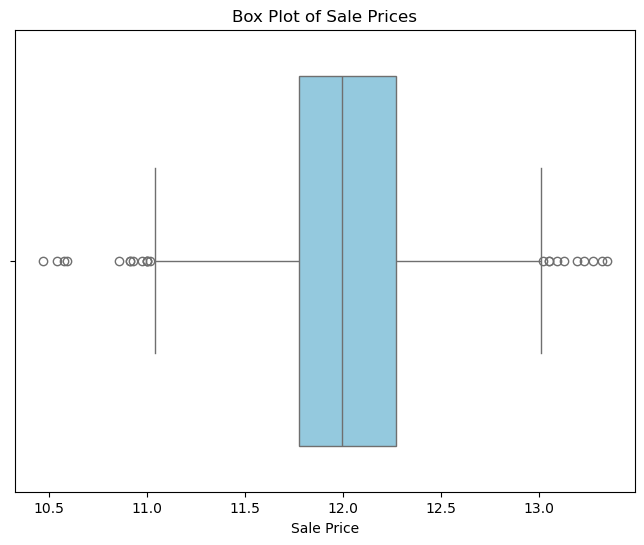

In [142]:
plt.figure(figsize=(8, 6))  
sns.boxplot(x=train_df['SalePrice'], color='skyblue')
plt.title('Box Plot of Sale Prices')
plt.xlabel('Sale Price')
plt.show()

### Numerical data distribution
We will now take a look at how the numerical features are distributed. In order to do this, let us first list all the types of data from our dataset and select only the numerical ones.

In [143]:
list(set(train_df.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

In [144]:
train_df_num = train_df.select_dtypes(include = ['float64', 'int64'])
train_df_num.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtUnfSF  LowQualFinSF  BedroomAbvGr  KitchenAbvGr  ...  PoolArea  \
0        150             0             3             1  ...         0   
1        284             0             3             1  ...         0   
2        434             0             3             1  ...         0   
3        540             0             3             1  ...         0   
4        490             0             4             1  ...         0   

   MiscVal  MoSold  SalePrice  houseage  houseremodelage  totalsf  totalarea  \
0        0       2  12.247699         5                5     2416       2566   
1        0       5  12.109016        31               31     2240       2524   
2        0       9  12.317171         7                6     2272       2706   
3        0       2  11.849405        91               36     1933       2473   
4        0      12  12.429220         8                8     2853       3343   

   totalbaths  totalporchsf  
0         3.5            61  
1         2.5           298  
2         3.5            42  
3         2.0           307  
4         3.5           276  

[5 rows x 23 columns]

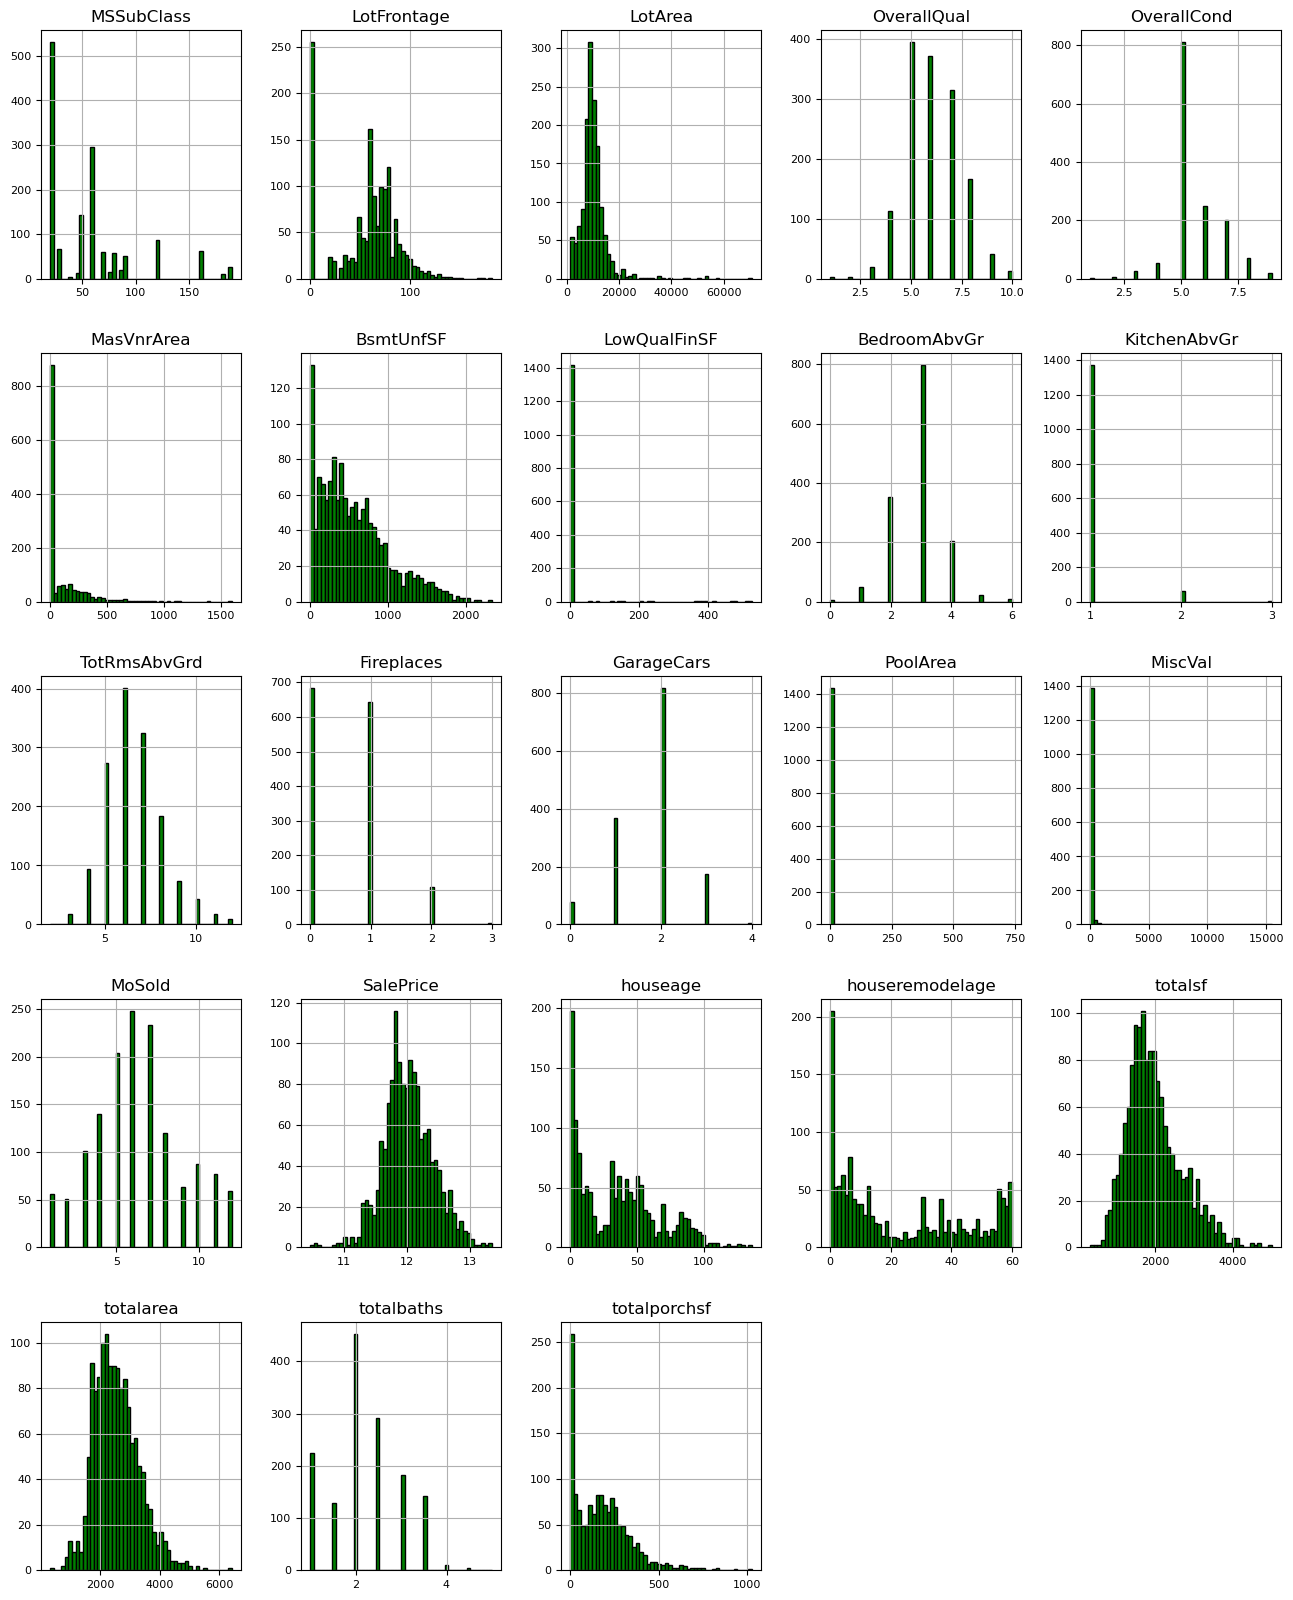

In [145]:
train_df_num.hist(figsize=(16,20), bins =50, xlabelsize=8, ylabelsize=8, color='g', edgecolor = 'black')
plt.show()

In [146]:
# Iterate over numerical columns and plot histograms sequentially
# for col in train_df_num.columns:
#     plt.figure(figsize=(5, 4))  # Adjust the figure size as needed
#     sns.distplot(train_df_num[col], color='g', bins=50, hist_kws={'alpha': 0.4, 'edgecolor': 'black'})
#     plt.xlabel(col)
#     plt.ylabel('Density')
#     plt.title(f'Histogram of {col}')
#     plt.tight_layout()
#     plt.show()

### Categorical data distribution
We will now take a look at how theCategoricall features are distributed. In order to do this, let us first list all the types of data from our dataset and select only theCategoricall ones.

In [147]:
train_df_cat = train_df.select_dtypes(include = 'O')
train_df_cat.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... Electrical KitchenQual Functional  \
0      CollgCr       Norm       Norm  ...      SBrkr          Gd        Typ   
1      Veenker      Feedr       Norm  ...      SBrkr          TA        Typ   
2      CollgCr       Norm       Norm  ...      SBrkr          Gd        Typ   
3      Crawfor       Norm       Norm  ...      SBrkr          Gd        Typ   
4      NoRidge       Norm       Norm  ...      SBrkr          Gd        Typ   

  FireplaceQu GarageType GarageFinish GarageQual PavedDrive SaleType  \
0          No     Attchd          RFn         TA          Y       WD   
1          TA     Attchd          RFn         TA          Y       WD   
2          TA     Attchd          RFn         TA          Y       WD   
3          Gd     Detchd          Unf         TA          Y       WD   
4          TA     Attchd          RFn         TA          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 37 columns]

In [148]:
train_df_cat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

Using Countplot to get the frequency of each categorical Variable

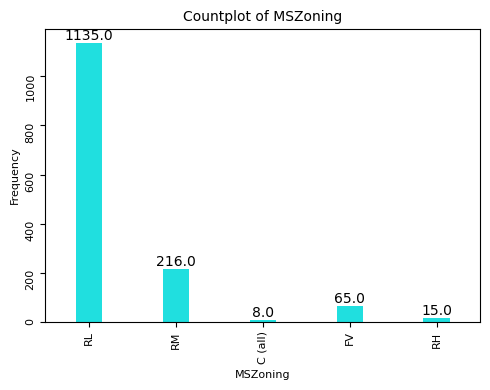

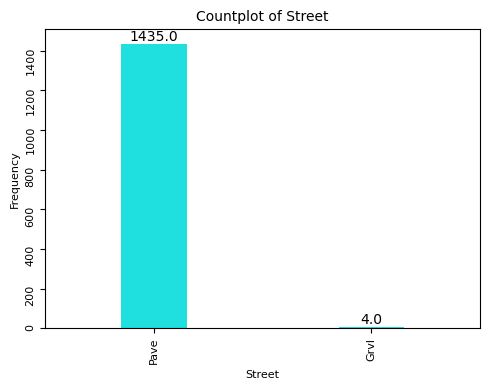

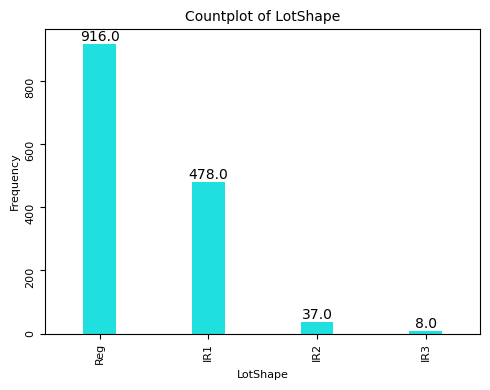

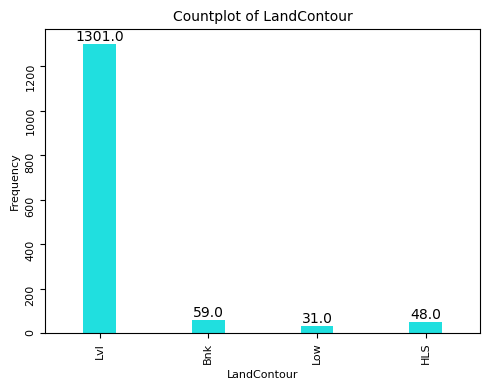

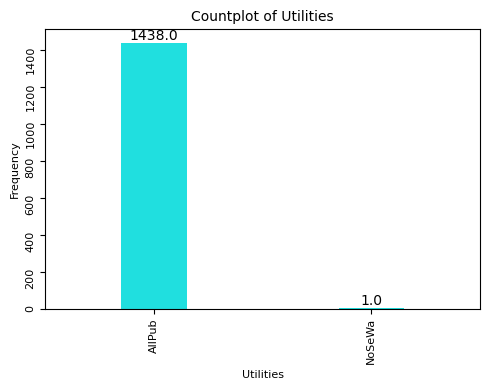

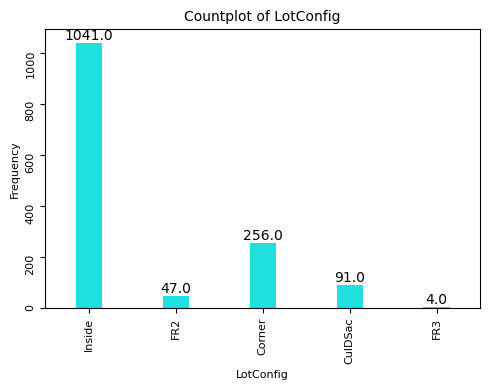

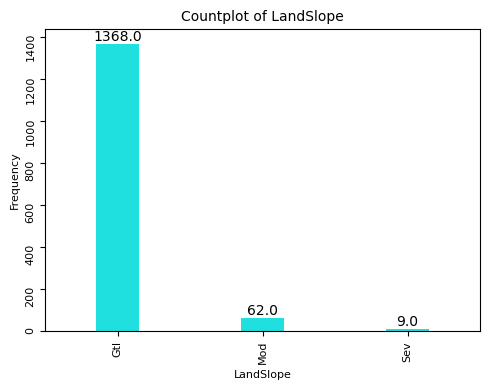

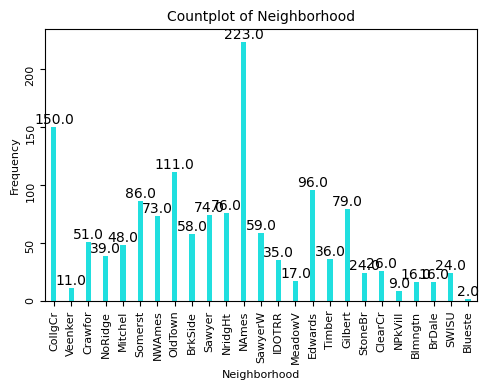

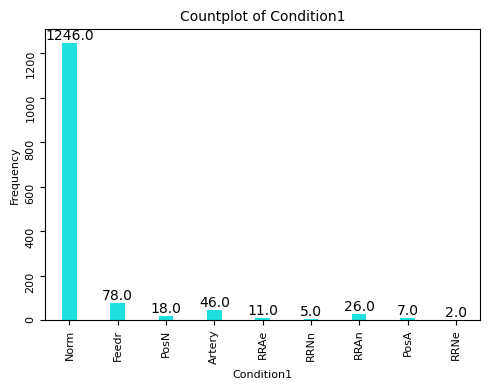

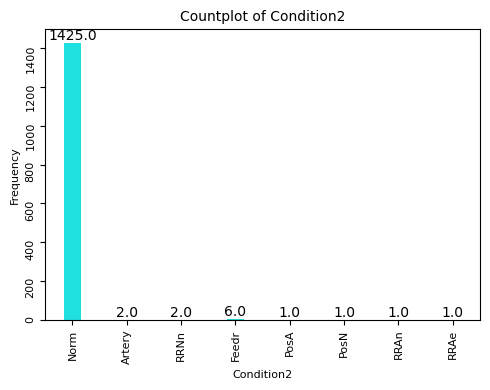

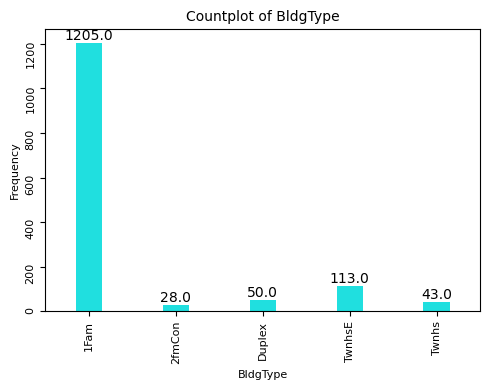

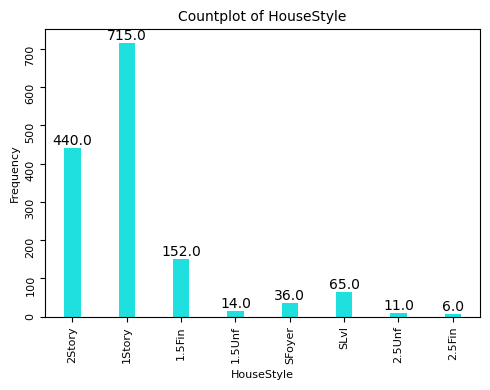

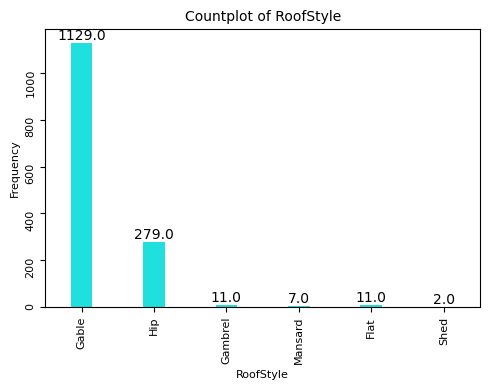

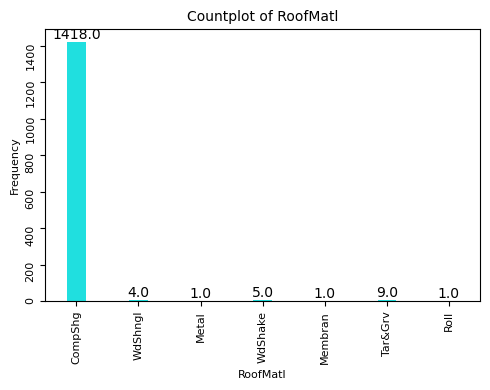

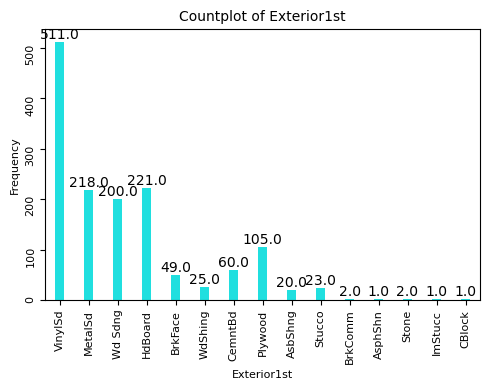

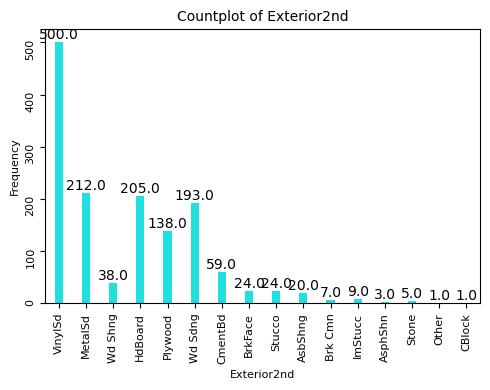

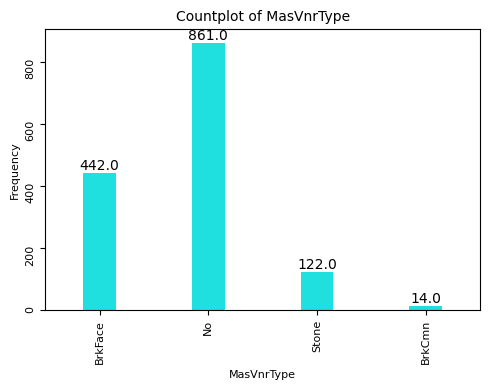

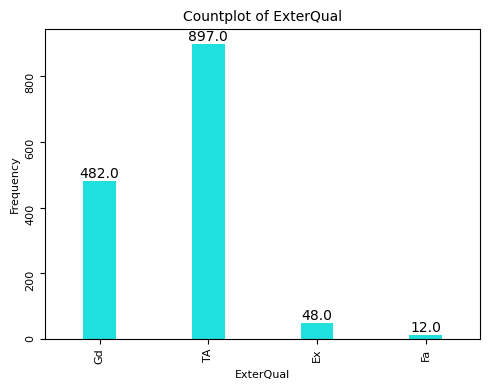

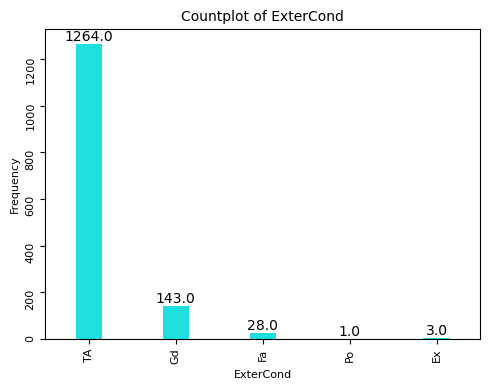

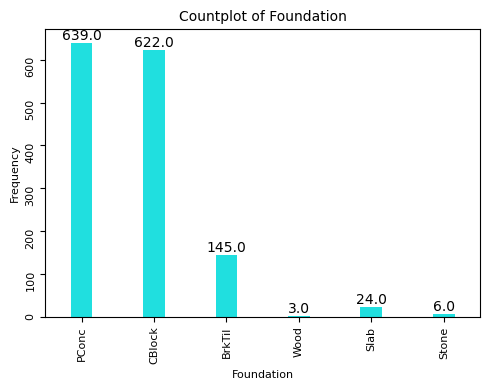

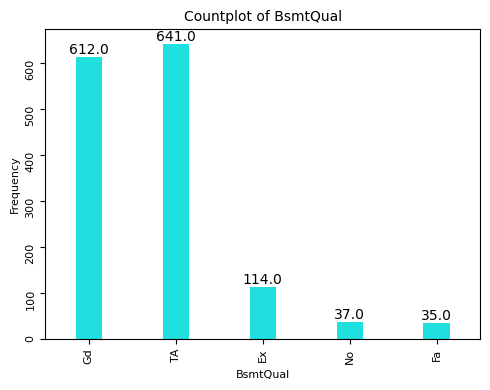

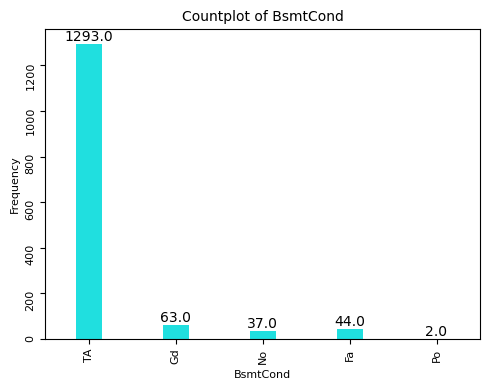

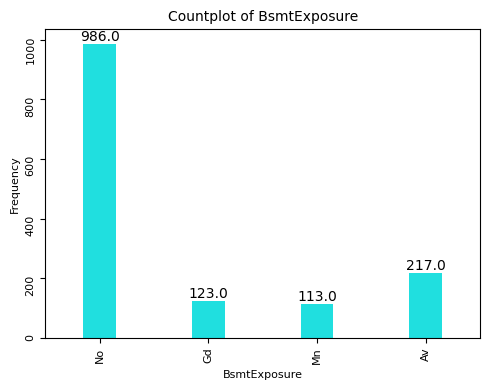

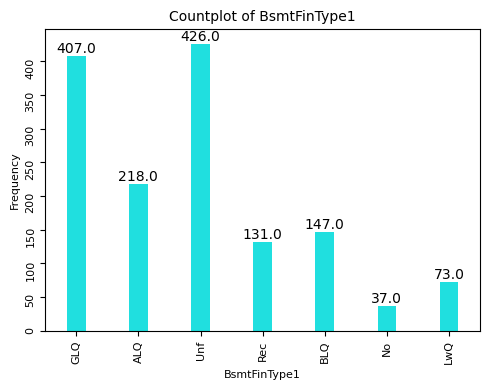

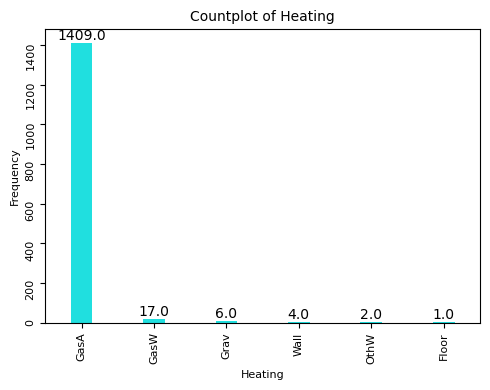

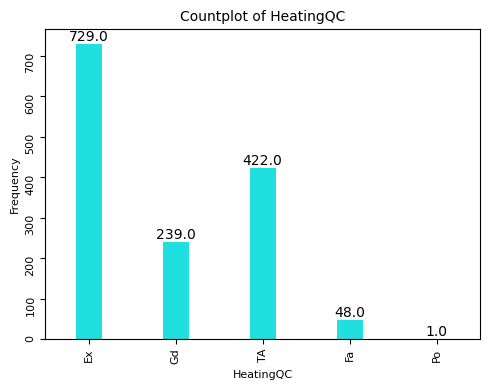

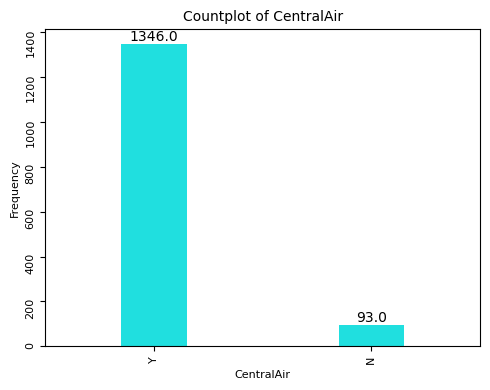

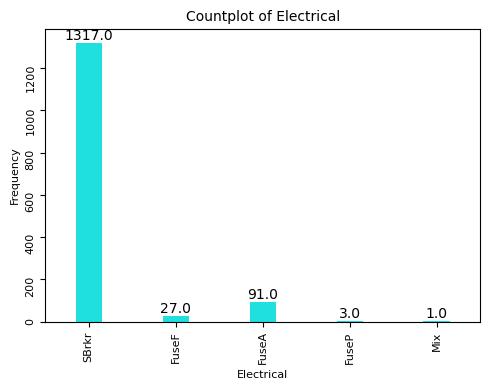

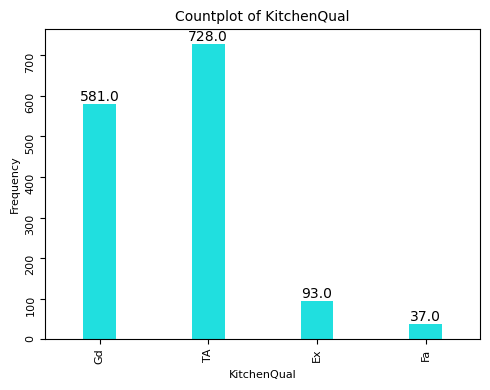

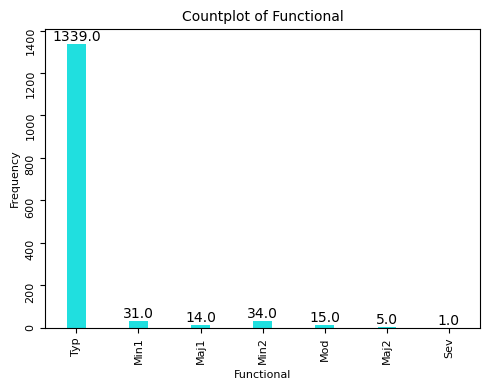

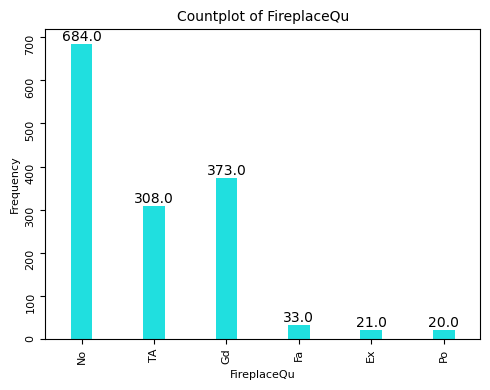

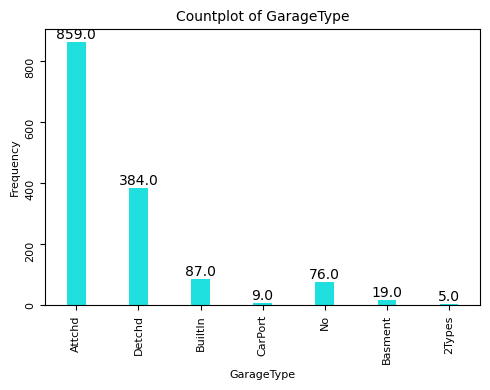

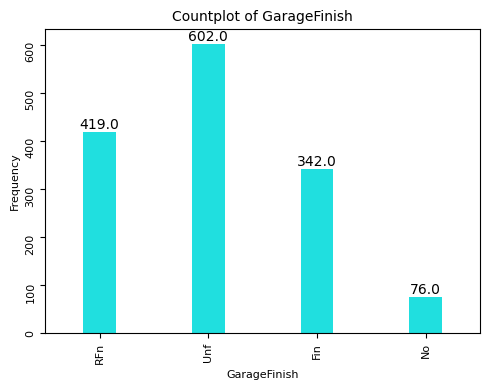

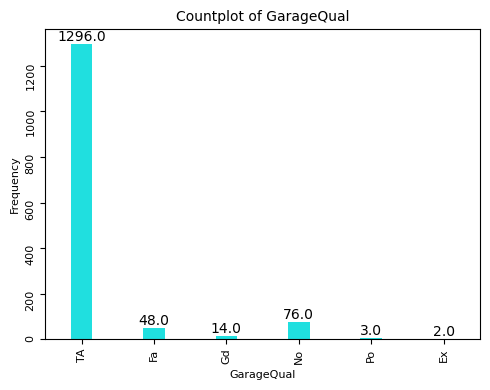

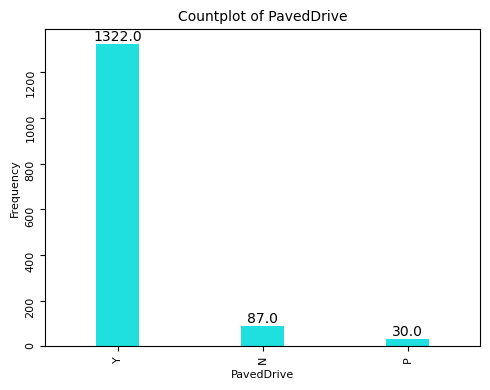

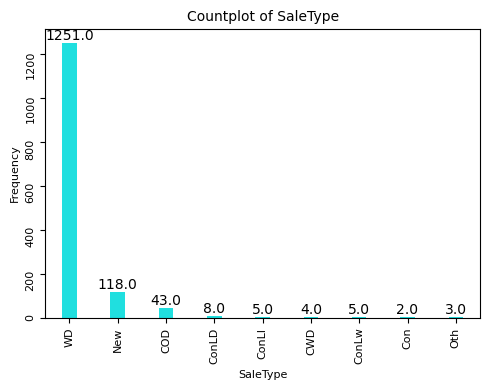

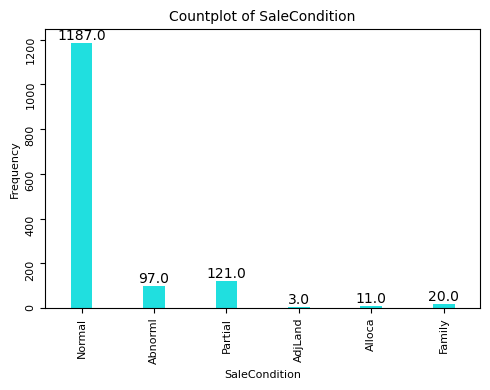

In [149]:
# Iterate over categorical columns and plot count plots sequentially
for col in train_df_cat.columns:
    plt.figure(figsize=(5, 4))  # Adjust the figure size as needed
    sns.countplot(x=col, data=train_df_cat, width = 0.3, color='cyan')
    for p in plt.gca().patches:
        plt.gca().annotate(f'{p.get_height()}', 
                       (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='bottom')
    plt.xlabel(col, fontsize=8)
    plt.ylabel('Frequency', fontsize=8)
    plt.title(f'Countplot of {col}', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=8, rotation = 90)
    plt.tight_layout()
    plt.show()


### Correlation 
Calculating correlation Matrix and retreiving top 20 correlation with SalePrice 

In [150]:
corr_matrix = train_df_num.corr()
corr_matrix

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass         1.000000    -0.217033 -0.299842     0.038963    -0.064205   
LotFrontage       -0.217033     1.000000  0.129455     0.152756    -0.050943   
LotArea           -0.299842     0.129455  1.000000     0.151382    -0.017413   
OverallQual        0.038963     0.152756  0.151382     1.000000    -0.097649   
OverallCond       -0.064205    -0.050943 -0.017413    -0.097649     1.000000   
MasVnrArea         0.026992     0.093907  0.118903     0.398440    -0.127154   
BsmtUnfSF         -0.143462     0.176552  0.045211     0.312675    -0.145640   
LowQualFinSF       0.020908     0.030311 -0.017858    -0.068377    -0.001404   
BedroomAbvGr      -0.042937     0.146341  0.195736     0.098716    -0.004323   
KitchenAbvGr       0.283269     0.039101 -0.013061    -0.188977    -0.096092   
TotRmsAbvGrd       0.030881     0.197015  0.288258     0.410932    -0.069967   
Fireplaces        -0.048391     0.017969  0.304154     0.382377    -0.027478   
GarageCars        -0.042337     0.169574  0.242623     0.606337    -0.188040   
PoolArea           0.004309    -0.003516  0.042250     0.004764     0.024026   
MiscVal           -0.009838    -0.060257  0.031792    -0.028726     0.069183   
MoSold            -0.006906     0.026470  0.009113     0.081225    -0.007075   
SalePrice         -0.079584     0.179437  0.359965     0.819931    -0.044453   
houseage          -0.033490    -0.038375 -0.041451    -0.581529     0.377788   
houseremodelage   -0.043117    -0.074906 -0.025810    -0.550357    -0.069213   
totalsf           -0.015324     0.112116  0.379658     0.524579    -0.075630   
totalarea         -0.097627     0.210123  0.378701     0.668250    -0.156288   
totalbaths         0.150729     0.055198  0.220638     0.538507    -0.178768   
totalporchsf      -0.046768     0.034412  0.271990     0.301653     0.034091   

                 MasVnrArea  BsmtUnfSF  LowQualFinSF  BedroomAbvGr  \
MSSubClass         0.026992  -0.143462      0.020908     -0.042937   
LotFrontage        0.093907   0.176552      0.030311      0.146341   
LotArea            0.118903   0.045211     -0.017858      0.195736   
OverallQual        0.398440   0.312675     -0.068377      0.098716   
OverallCond       -0.127154  -0.145640     -0.001404     -0.004323   
MasVnrArea         1.000000   0.112257     -0.064561      0.105596   
BsmtUnfSF          0.112257   1.000000      0.015160      0.167943   
LowQualFinSF      -0.064561   0.015160      1.000000      0.047965   
BedroomAbvGr       0.105596   0.167943      0.047965      1.000000   
KitchenAbvGr      -0.033545   0.021879     -0.024376      0.191635   
TotRmsAbvGrd       0.272899   0.249589      0.077455      0.681452   
Fireplaces         0.233794   0.053419     -0.038785      0.109312   
GarageCars         0.363950   0.214988     -0.105673      0.099807   
PoolArea          -0.010957  -0.023617     -0.005903      0.055685   
MiscVal           -0.029964  -0.023985     -0.002084      0.008160   
MoSold             0.003053   0.039903     -0.006693      0.052708   
SalePrice          0.430286   0.227903     -0.076837      0.206158   
houseage          -0.308453  -0.153670      0.157915      0.059138   
houseremodelage   -0.169926  -0.182595      0.079371      0.045115   
totalsf            0.388374  -0.193030     -0.048595      0.295720   
totalarea          0.423632   0.410981      0.021708      0.376820   
totalbaths         0.307607  -0.098633     -0.057677      0.235285   
totalporchsf       0.153496   0.051058     -0.016755      0.106816   

                 KitchenAbvGr  ...  PoolArea   MiscVal    MoSold  SalePrice  \
MSSubClass           0.283269  ...  0.004309 -0.009838 -0.006906  -0.079584   
LotFrontage          0.039101  ... -0.003516 -0.060257  0.026470   0.179437   
LotArea             -0.013061  ...  0.042250  0.031792  0.009113   0.359965   
OverallQual         -0.188977  ...  0.004764 -0.028726  0.081225   0.819931   
OverallCond         

In [151]:
# Extracting the top 20 correlated columns
top_corr_columns = corr_matrix.nlargest(20, 'SalePrice')['SalePrice'].index
top_corr_columns

Index(['SalePrice', 'OverallQual', 'totalarea', 'totalsf', 'GarageCars',
       'totalbaths', 'TotRmsAbvGrd', 'Fireplaces', 'MasVnrArea',
       'totalporchsf', 'LotArea', 'BsmtUnfSF', 'BedroomAbvGr', 'LotFrontage',
       'MoSold', 'PoolArea', 'MiscVal', 'OverallCond', 'LowQualFinSF',
       'MSSubClass'],
      dtype='object')

In [152]:
# Filter correlation matrix to include only top features
filtered_corr_matrix = corr_matrix.loc[top_corr_columns, top_corr_columns]
filtered_corr_matrix

SalePrice  OverallQual  totalarea   totalsf  GarageCars  \
SalePrice      1.000000     0.819931   0.816923  0.738716    0.686387   
OverallQual    0.819931     1.000000   0.668250  0.524579    0.606337   
totalarea      0.816923     0.668250   1.000000  0.813362    0.560729   
totalsf        0.738716     0.524579   0.813362  1.000000    0.473222   
GarageCars     0.686387     0.606337   0.560729  0.473222    1.000000   
totalbaths     0.678090     0.538507   0.606138  0.717895    0.500292   
TotRmsAbvGrd   0.529457     0.410932   0.680181  0.568316    0.360678   
Fireplaces     0.478315     0.382377   0.461963  0.465287    0.289936   
MasVnrArea     0.430286     0.398440   0.423632  0.388374    0.363950   
totalporchsf   0.410074     0.301653   0.398071  0.396711    0.234319   
LotArea        0.359965     0.151382   0.378701  0.379658    0.242623   
BsmtUnfSF      0.227903     0.312675   0.410981 -0.193030    0.214988   
BedroomAbvGr   0.206158     0.098716   0.376820  0.295720    0.099807   
LotFrontage    0.179437     0.152756   0.210123  0.112116    0.169574   
MoSold         0.070681     0.081225   0.069920  0.050301    0.046511   
PoolArea       0.035563     0.004764   0.021910  0.038900    0.000292   
MiscVal       -0.020037    -0.028726  -0.010947  0.003566   -0.045478   
OverallCond   -0.044453    -0.097649  -0.156288 -0.075630   -0.188040   
LowQualFinSF  -0.076837    -0.068377   0.021708 -0.048595   -0.105673   
MSSubClass    -0.079584     0.038963  -0.097627 -0.015324   -0.042337   

              totalbaths  TotRmsAbvGrd  Fireplaces  MasVnrArea  totalporchsf  \
SalePrice       0.678090      0.529457    0.478315    0.430286      0.410074   
OverallQual     0.538507      0.410932    0.382377    0.398440      0.301653   
totalarea       0.606138      0.680181    0.461963    0.423632      0.398071   
totalsf         0.717895      0.568316    0.465287    0.388374      0.396711   
GarageCars      0.500292      0.360678    0.289936    0.363950      0.234319   
totalbaths      1.000000      0.460851    0.319093    0.307607      0.311983   
TotRmsAbvGrd    0.460851      1.000000    0.313355    0.272899      0.246998   
Fireplaces      0.319093      0.313355    1.000000    0.233794      0.280512   
MasVnrArea      0.307607      0.272899    0.233794    1.000000      0.153496   
totalporchsf    0.311983      0.246998    0.280512    0.153496      1.000000   
LotArea         0.220638      0.288258    0.304154    0.118903      0.271990   
BsmtUnfSF      -0.098633      0.249589    0.053419    0.112257      0.051058   
BedroomAbvGr    0.235285      0.681452    0.109312    0.105596      0.106816   
LotFrontage     0.055198      0.197015    0.017969    0.093907      0.034412   
MoSold          0.033360      0.049559    0.057173    0.003053      0.053573   
PoolArea        0.030953      0.035941    0.049759   -0.010957      0.100540   
MiscVal        -0.026702      0.026419   -0.000314   -0.029964      0.002151   
OverallCond    -0.178768     -0.069967   -0.027478   -0.127154      0.034091   
LowQualFinSF   -0.057677      0.077455   -0.038785   -0.064561     -0.016755   
MSSubClass      0.150729      0.030881   -0.048391    0.026992     -0.046768   

               LotArea  BsmtUnfSF  BedroomAbvGr  LotFrontage    MoSold  \
SalePrice     0.359965   0.227903      0.206158     0.179437  0.070681   
OverallQual   0.151382   0.312675      0.098716     0.152756  0.081225   
totalarea     0.378701   0.410981      0.376820     0.210123  0.069920   
totalsf       0.379658  -0.193030      0.295720     0.112116  0.050301   
GarageCars    0.242623   0.214988      0.099807     0.169574  0.046511   
totalbaths    0.220638  -0.098633      0.235285     0.055198  0.033360   
TotRmsAbvGrd  0.288258   0.249589      0.681452     0.197015  0.049559   
Fireplaces    0.304154   0.053419      0.109312     0.017969  0.057173   
MasVnrArea    0.118903   0.112257      0.105596     0.093907  0.003053   
totalporchsf  0.271990   0.051058      0.106816     0.03441

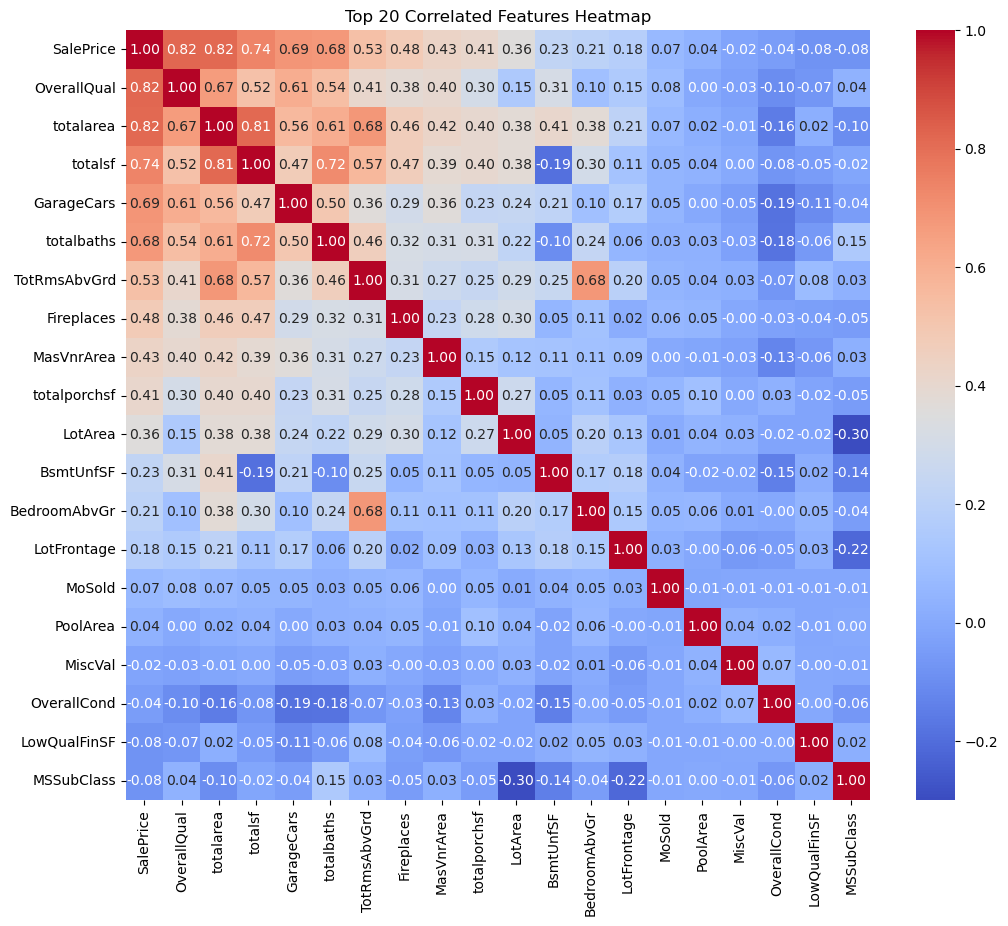

In [153]:
# Plotting the heatmap
plt.figure(figsize=(12, 10))  
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top 20 Correlated Features Heatmap')
plt.show()

# Bivariate Analysis


### Numerical VS Numerical
Lets perform some Bivariate analysis on Top 20 Correlated Columns with Target value

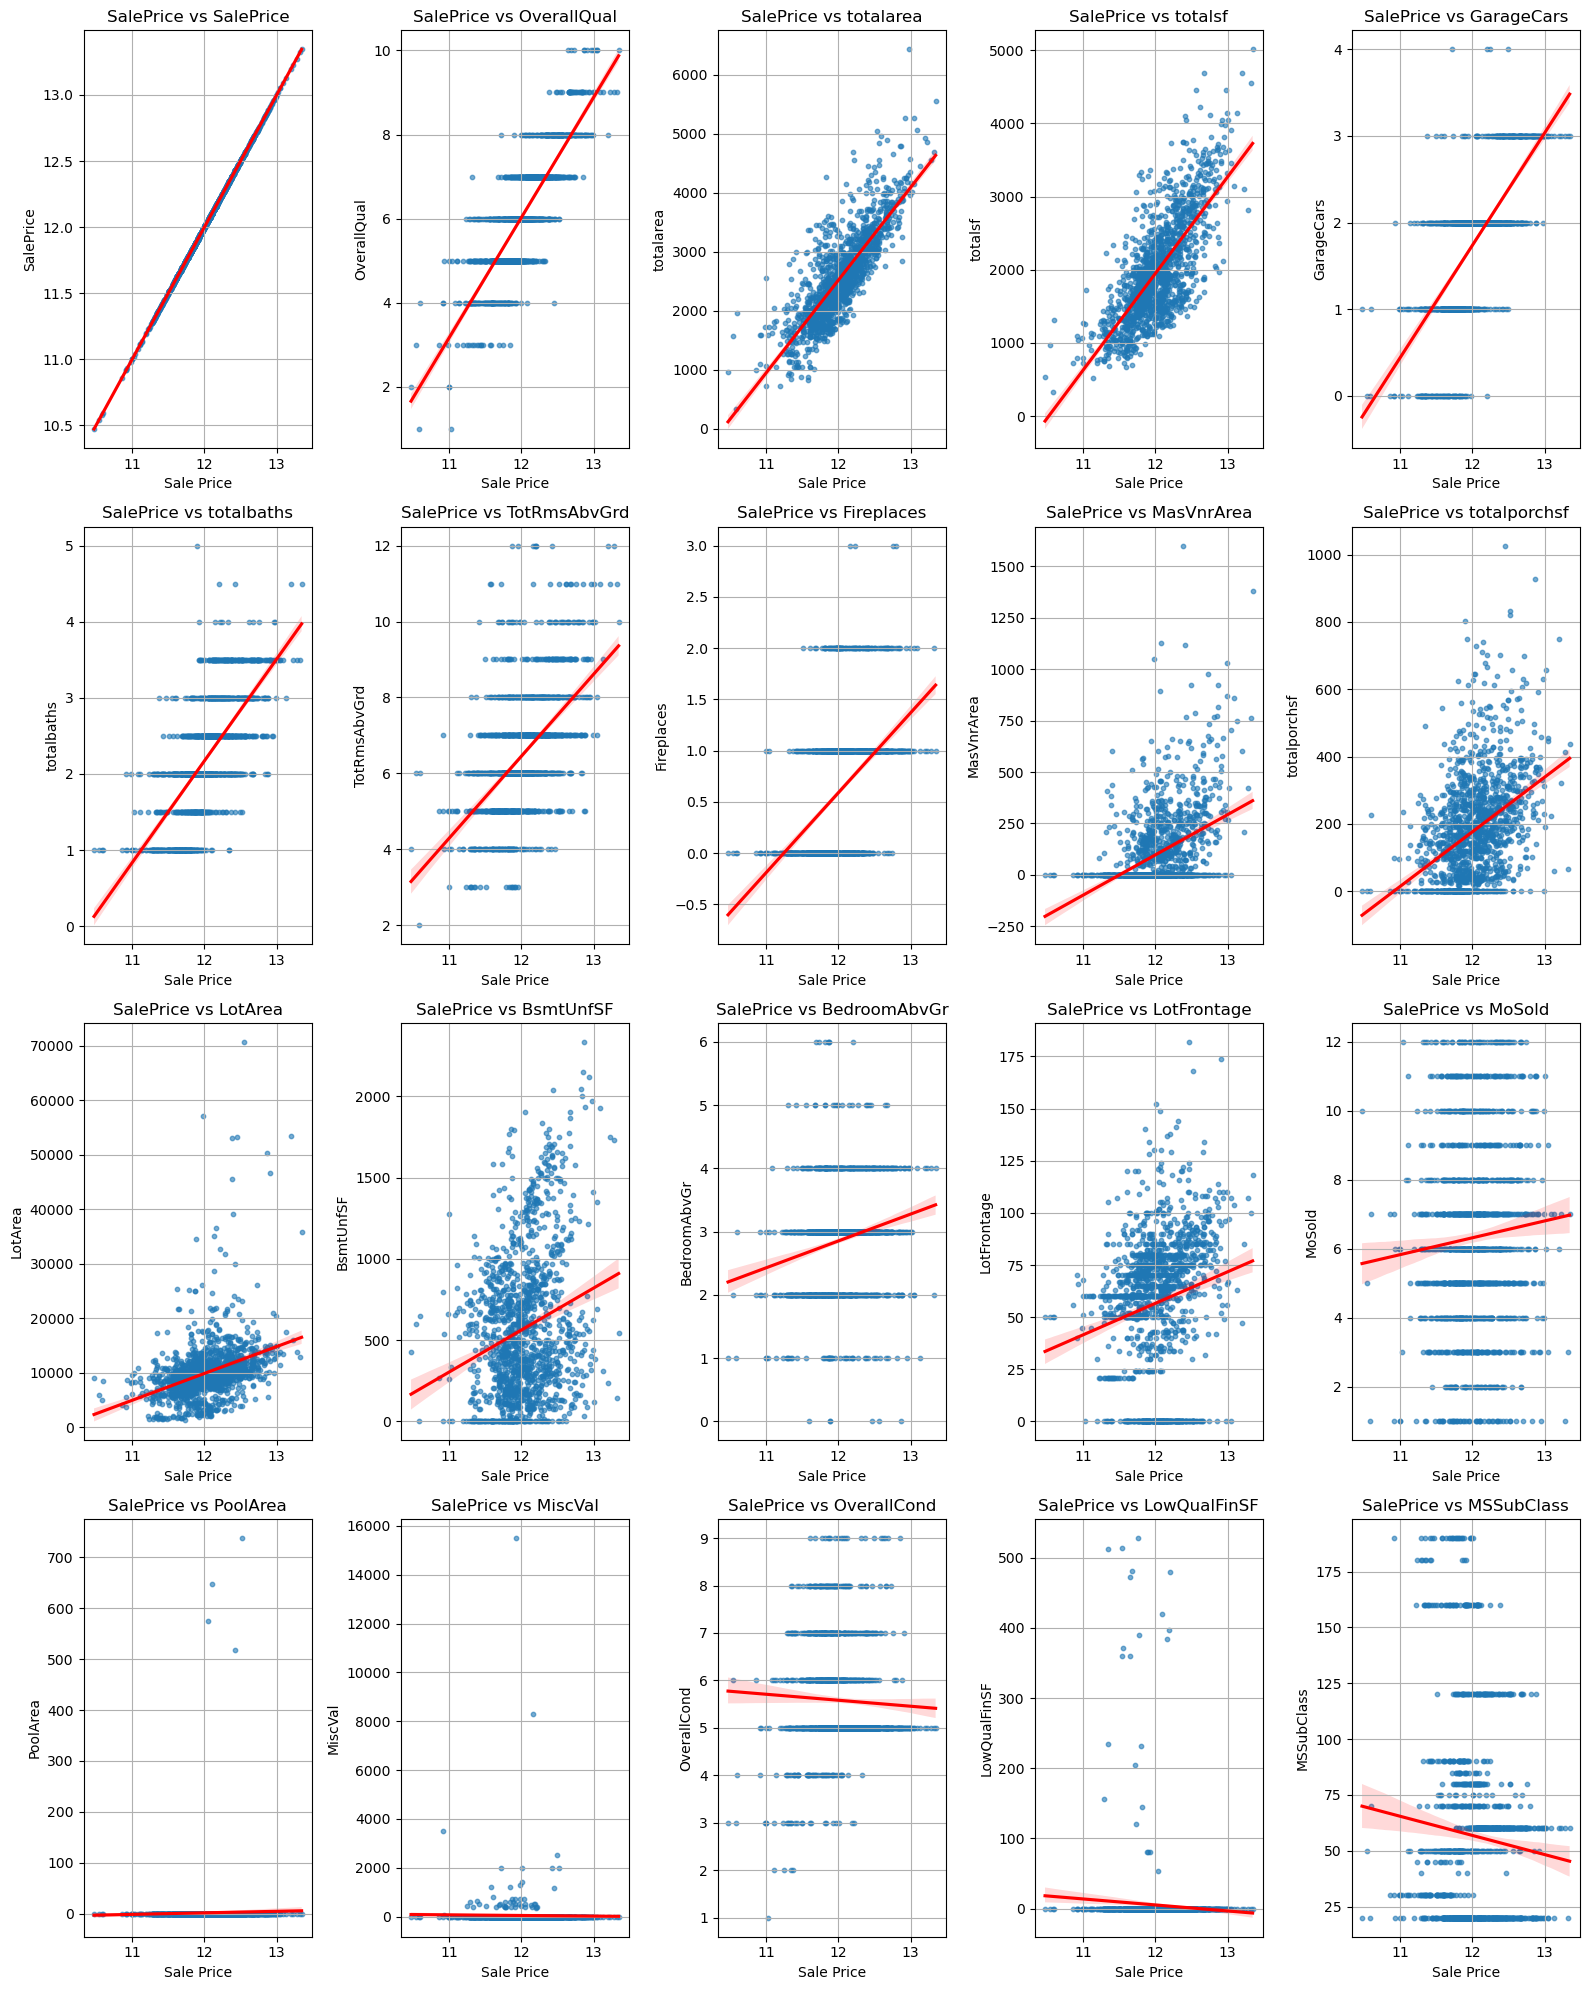

In [154]:
# Adjust figure size globally
plt.figure(figsize=(16, 20))

# Loop through each column in top_corr_columns
for i, col in enumerate(top_corr_columns, 1):
    plt.subplot(4, 5, i)  # Adjust subplot layout as needed
    sns.regplot(x='SalePrice', y=col, data=train_df, scatter_kws={'s': 10, 'alpha': 0.6}, line_kws={'color': 'red'})
    plt.title(f'SalePrice vs {col}')
    plt.xlabel('Sale Price')
    plt.ylabel(col)
    plt.grid(True)
    

# Adjust layout
plt.tight_layout()
plt.show()